# data pre-process

## non_death_basic_information

In [1]:
import pandas as pd
inputfile = './data/non_death_797.xlsx'
data_gender_age = pd.read_excel(inputfile, sheet_name=u'基本信息', index_col=u'登记号', usecols=[1, 2, 3])

data_gender_age.index.name = 'id'
data_gender_age.columns = ['gender', 'age']

data_gender_age.loc[data_gender_age[u'gender'] == u'男', u'gender'] = 1  # 男--1  (493)
data_gender_age.loc[data_gender_age[u'gender'] == u'女', u'gender'] = 0  # 女--0  (304)

data_gender_age.head()

,gender,age
id,,
21607239,1,51
21601820,1,52
21608061,1,77
21608526,1,83
21608210,0,70


In [2]:
data_gender_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797 entries, 21607239 to 17898532
Data columns (total 2 columns):
gender    797 non-null object
age       797 non-null int64
dtypes: int64(1), object(1)
memory usage: 18.7+ KB


In [3]:
data_gender_age.iloc[194, 0] = 0  # unright form data， hand-fill [575, 1] with mean age
data_gender_age.iloc[447, 0] = 1
data_gender_age.iloc[505, 0] = 1

In [4]:
data_gender_age.isnull().sum()

gender    0
age       0
dtype: int64

In [5]:
data_gender_age.dtypes

gender    int64
age       int64
dtype: object

In [6]:
data_gender_age.describe().round(5)

,gender,age
count,797.00000,797.00000
mean,0.61857,54.77792
std,0.48604,19.59020
min,0.00000,1.00000
25%,0.00000,42.00000
50%,1.00000,56.00000
75%,1.00000,70.00000
max,1.00000,93.00000


In [7]:
outputfile_1 = './tmp/non_death_data_gender_age.xlsx'
#data_gender_age.to_excel(outputfile_1)

## non_death_biochemical

In [8]:
data_biochemical = pd.read_excel(inputfile, sheet_name=u'血常规、生化、凝血功能、心肌标志物', skiprows=2, header=None)

# remove name、data
data_biochemical.drop(labels=[0, 2, 23, 59, 69], axis=1, inplace=True)  
# 设置列全部显示
pd.set_option('display.max_columns', None)  
# 设置列名
data_biochemical.columns = ['id', 'RBC', 'Hemoglobin', 'Hematocrit', 'MRBC', 'MHGBC',
                 'MEHGBC', 'RBCCV', 'RBCSD', 'Platelet', 'WBCC', 'NNPC', 'LPPC',
                 'MCPC', 'ESPC', 'BSPC', 'NNAV', 'LPAV', 'MCAV', 'ESAV', 'BSAV', 'TBB',
                 'DBB', 'IDBB', 'AST', 'ALT', 'AST_ALT', 'TP', 'ALB', 'GLO', 'WBR', 'GLU',
                 'Urea', 'Creatinine', 'EGFR', 'DSCC', 'UA', 'Triglyceride', 'cholesterol', 'HDLP',
                 'LDLP', 'AKPP', 'GLTP', 'CTKN', 'LTDD', 'HBDD', 'sodium', 'potassium', 'chlorine', 'CO2BF',
                 'AG', 'DSHA', 'calcium', 'magnesium', 'SIPP', 'TTBA', 'PRT', 'INR', 'APTT', 'APTTR', 'TBT',
                 'TBTR', 'Fibrinogen', 'FDP', 'FEU', 'Myoglobin', 'MCKMB', 'UNP', 'Troponin']

data_biochemical.head()

,id,RBC,Hemoglobin,Hematocrit,MRBC,MHGBC,MEHGBC,RBCCV,RBCSD,Platelet,WBCC,NNPC,LPPC,MCPC,ESPC,BSPC,NNAV,LPAV,MCAV,ESAV,BSAV,TBB,DBB,IDBB,AST,ALT,AST_ALT,TP,ALB,GLO,WBR,GLU,Urea,Creatinine,EGFR,DSCC,UA,Triglyceride,cholesterol,HDLP,LDLP,AKPP,GLTP,CTKN,LTDD,HBDD,sodium,potassium,chlorine,CO2BF,AG,DSHA,calcium,magnesium,SIPP,TTBA,PRT,INR,APTT,APTTR,TBT,TBTR,Fibrinogen,FDP,FEU,Myoglobin,MCKMB,UNP,Troponin
0,21607239,4.42,141.0,0.38,85.3,31.9,374.0,11.2,34.8,230.0,16.24,92.0,3.3,3.1,0.9,0.7,14.94,0.54,0.50,0.15,0.11,22.5,19.7,2.8,104.0,178.0,1.71,66.2,21.5,44.7,0.48,10.92,17.4,127.0,55.99,1.45,385.0,0.90,1.09,0.09,0.08,52.0,20.0,1445.0,316.0,255.0,120.0,3.49,77.9,12.4,33.2,0.11,1.92,0.95,1.40,3.4,13.8,1.26,31.3,1.13,15.2,0.93,7.44,13.1,6.80,1546.0,26.34,1266.0,9.3
1,21607239,3.20,105.0,0.27,85.3,32.8,385.0,11.5,35.6,155.0,11.06,93.4,3.2,2.5,0.4,0.5,10.33,0.35,0.28,0.04,0.06,24.9,22.6,2.3,89.0,164.0,1.84,51.1,24.0,27.1,0.89,4.56,11.8,59.0,111.43,0.94,248.0,1.39,0.97,0.08,0.06,40.0,11.0,1130.0,240.0,189.0,131.2,3.28,92.8,18.9,22.8,0.42,1.77,0.97,0.73,11.5,14.2,1.30,40.0,1.44,14.0,0.86,5.62,9.9,5.54,195.1,3.92,1359.0,7.3
2,21607239,3.27,103.0,0.29,87.2,31.5,361.0,11.9,37.5,90.0,17.27,96.0,2.3,1.6,0.0,0.1,16.58,0.40,0.28,0.00,0.02,30.6,22.8,7.8,98.0,147.0,1.50,51.0,19.8,31.2,0.63,6.99,8.7,52.0,117.37,1.01,158.0,0.89,0.75,0.08,0.04,50.0,12.0,912.0,337.0,246.0,136.5,3.48,102.0,15.8,22.2,0.12,1.82,0.93,0.29,16.7,13.6,1.24,31.9,1.15,15.1,0.93,3.35,12.5,7.54,72.6,2.47,551.0,15.1
3,21607239,3.10,96.0,0.27,87.4,31.0,354.0,12.5,39.7,55.0,15.27,95.5,2.3,2.0,0.1,0.1,14.58,0.35,0.31,0.02,0.02,24.1,19.3,4.8,119.0,158.0,1.33,48.1,17.3,30.8,0.56,7.81,13.1,54.0,115.56,0.98,194.0,0.84,0.75,0.09,0.08,59.0,19.0,381.0,318.0,255.0,143.6,3.79,112.7,17.7,17.0,0.04,1.76,0.93,0.76,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21607239,2.92,92.0,0.26,89.7,31.5,351.0,13.2,43.1,72.0,12.68,92.8,3.2,3.1,0.0,0.9,11.77,0.41,0.39,0.00,0.11,19.9,15.4,4.5,125.0,143.0,1.14,50.7,19.1,31.6,0.60,12.80,14.4,49.0,120.27,0.90,235.0,1.13,0.97,0.09,0.1,66.0,36.0,150.0,260.0,203.0,144.1,4.81,113.2,24.3,11.4,0.05,1.86,0.91,1.77,5.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data_biochemical = data_biochemical.set_index('id')
data_biochemical.isnull().sum()

RBC            256
Hemoglobin     256
Hematocrit     256
MRBC           256
MHGBC          256
              ... 
FEU            998
Myoglobin     1401
MCKMB         1402
UNP           1664
Troponin      1419
Length: 68, dtype: int64

In [10]:
row, col = data_biochemical.shape
count = 0
for i in range(row):
    for j in range(col):
        temp = data_biochemical.iloc[i,j]
        if type(temp) == str:
            count += 1
            data_biochemical.iloc[i,j] = None
            print(temp)  

print("count: ",count)

〈0.08
-----
-----
count:  3


In [11]:
#pd.set_option('display.max_rows', None)      # 显示所有行
#data_biochemical.dtypes

data_biochemical['RBCCV'] = data_biochemical['RBCCV'] .astype(float)
data_biochemical['RBCSD'] = data_biochemical['RBCSD'] .astype(float)
data_biochemical['LDLP'] = data_biochemical['LDLP'] .astype(float)

In [12]:
# 按照各个分组用中位数填充空值
data_biochemical = data_biochemical.groupby('id').apply(lambda x: x.fillna(x.median()))
data_biochemical.isnull().sum()

d:\python3.6.0\lib\site-packages\numpy\lib\nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


RBC             0
Hemoglobin      0
Hematocrit      0
MRBC            0
MHGBC           0
             ... 
FEU            22
Myoglobin     294
MCKMB         294
UNP           406
Troponin      306
Length: 68, dtype: int64

In [13]:
# 整个数据为空的病人用各列均值来填充
data_biochemical = data_biochemical.fillna(data_biochemical.mean())
data_biochemical.isnull().sum().sum()

0

In [14]:
# 取各组均值作为病人对应特征的特征值
data_biochemical_mean = data_biochemical.groupby('id').mean()
data_biochemical_mean.shape

(794, 68)

In [15]:
data_biochemical_mean.describe().round(1)

,RBC,Hemoglobin,Hematocrit,MRBC,MHGBC,MEHGBC,RBCCV,RBCSD,Platelet,WBCC,NNPC,LPPC,MCPC,ESPC,BSPC,NNAV,LPAV,MCAV,ESAV,BSAV,TBB,DBB,IDBB,AST,ALT,AST_ALT,TP,ALB,GLO,WBR,GLU,Urea,Creatinine,EGFR,DSCC,UA,Triglyceride,cholesterol,HDLP,LDLP,AKPP,GLTP,CTKN,LTDD,HBDD,sodium,potassium,chlorine,CO2BF,AG,DSHA,calcium,magnesium,SIPP,TTBA,PRT,INR,APTT,APTTR,TBT,TBTR,Fibrinogen,FDP,FEU,Myoglobin,MCKMB,UNP,Troponin
count,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0,794.0
mean,3.5,102.2,0.4,91.2,30.0,327.1,22.3,41.8,157.5,12.8,83.3,10.7,4.4,0.8,0.2,9.9,1.5,0.5,0.1,0.0,30.6,21.4,9.2,125.2,203.8,2.0,60.1,31.7,28.4,1.2,9.1,12.2,172.2,72.4,2.3,329.7,2.2,3.4,0.9,1.6,111.7,82.3,1153.2,565.9,395.2,137.0,4.1,102.0,20.8,19.5,0.5,2.0,0.8,1.2,17.0,16.0,1.4,38.7,1.4,20.4,1.2,3.8,18.3,8.0,448.6,15.8,6960.0,164.7
std,1.1,29.3,0.8,7.7,4.7,29.8,11.1,11.3,96.3,18.1,11.7,9.0,2.2,1.7,0.7,5.7,12.8,0.4,0.1,0.1,66.6,54.9,14.7,374.2,660.6,1.7,9.5,5.5,7.2,0.3,4.2,9.6,214.4,36.5,9.2,198.1,6.1,3.6,1.8,2.0,130.7,148.9,7983.8,792.1,448.1,10.3,0.8,7.4,6.4,5.8,0.7,0.2,0.2,0.6,35.4,7.8,1.5,15.6,0.6,11.1,0.5,2.3,17.8,8.5,668.8,151.5,9313.5,555.8
min,0.4,35.7,0.0,56.8,17.2,254.5,0.0,0.0,1.8,0.1,2.0,0.7,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8,0.4,0.2,1.0,5.5,0.1,30.1,16.5,7.6,0.3,2.9,1.2,10.3,2.0,0.5,48.0,0.1,0.5,0.0,0.0,23.8,5.2,7.0,84.0,75.0,56.5,1.7,67.6,1.7,6.0,0.0,1.1,0.4,0.1,0.1,9.2,0.8,18.9,0.7,14.2,0.9,0.5,2.5,0.1,21.0,0.3,5.2,3.0
25%,2.6,78.0,0.2,87.1,28.6,316.0,14.3,35.8,88.7,7.6,80.4,5.6,3.0,0.1,0.0,6.3,0.5,0.3,0.0,0.0,8.0,3.9,3.6,16.0,26.0,1.1,54.1,27.8,23.9,0.9,6.5,5.6,56.5,55.0,0.8,185.5,1.0,2.3,0.4,0.9,62.0,23.0,59.0,232.6,181.6,134.2,3.7,97.4,16.8,15.8,0.1,1.9,0.8,0.8,3.1,12.6,1.1,29.0,1.0,16.7,1.0,2.2,5.9,2.1,63.4,1.8,682.1,23.1
50%,3.5,102.1,0.3,91.6,30.0,326.8,17.5,42.7,140.0,10.4,86.1,8.3,4.2,0.4,0.1,8.9,0.9,0.4,0.0,0.0,13.0,6.7,5.6,28.5,42.5,1.5,60.1,31.2,28.0,1.2,8.0,9.3,87.0,72.1,1.2,287.3,1.3,2.9,0.7,1.4,83.5,44.9,141.6,320.8,249.2,137.8,4.0,101.6,20.4,18.4,0.3,2.0,0.8,1.0,10.2,13.9,1.2,34.7,1.2,17.7,1.1,3.5,12.1,5.1,199.3,3.7,3644.5,54.6
75%,4.2,124.0,0.4,95.9,31.3,336.0,27.2,48.7,212.6,14.4,89.9,12.7,5.5,1.0,0.2,12.2,1.3,0.6,0.1,0.0,22.4,13.0,9.0,63.4,87.9,2.3,66.4,35.2,32.5,1.4,10.7,15.4,181.0,91.7,2.1,439.9,2.1,3.8,1.0,2.0,120.4,92.5,432.3,560.9,425.1,141.4,4.4,106.2,24.2,22.5,0.5,2.1,0.9,1.4,18.4,16.2,1.4,43.0,1.5,19.4,1.2,4.9,23.3,10.1,470.1,11.8,7041.4,173.5
max,10.6,181.0,15.8,118.7,106.4,1006.8,80.4,79.9,673.5,368.3,98.3,97.4,14.9,35.4,19.0,74.0,358.8,7.0,2.1,1.4,621.1,477.4,150.8,3474.4,8038.0,15.0,125.9,49.9,94.8,3.0,44.3,64.8,1687.0,213.2,191.1,2466.5,156.9,89.4,47.3,46.1,2308.0,3080.0,154237.4,8223.0,5296.2,175.9,18.7,138.4,47.8,50.8,7.9,2.7,1.6,4.2,373.4,94.6,37.8,135.2,10.0,120.0,6.7,30.3,80.0,38.0,3000.0,4208.5,35000.0,8448.5


In [16]:
data_biochemical_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 794 entries, 39576 to 21618936
Data columns (total 68 columns):
RBC             794 non-null float64
Hemoglobin      794 non-null float64
Hematocrit      794 non-null float64
MRBC            794 non-null float64
MHGBC           794 non-null float64
MEHGBC          794 non-null float64
RBCCV           794 non-null float64
RBCSD           794 non-null float64
Platelet        794 non-null float64
WBCC            794 non-null float64
NNPC            794 non-null float64
LPPC            794 non-null float64
MCPC            794 non-null float64
ESPC            794 non-null float64
BSPC            794 non-null float64
NNAV            794 non-null float64
LPAV            794 non-null float64
MCAV            794 non-null float64
ESAV            794 non-null float64
BSAV            794 non-null float64
TBB             794 non-null float64
DBB             794 non-null float64
IDBB            794 non-null float64
AST             794 non-null float6

In [17]:
data_biochemical_mean.head()

,RBC,Hemoglobin,Hematocrit,MRBC,MHGBC,MEHGBC,RBCCV,RBCSD,Platelet,WBCC,NNPC,LPPC,MCPC,ESPC,BSPC,NNAV,LPAV,MCAV,ESAV,BSAV,TBB,DBB,IDBB,AST,ALT,AST_ALT,TP,ALB,GLO,WBR,GLU,Urea,Creatinine,EGFR,DSCC,UA,Triglyceride,cholesterol,HDLP,LDLP,AKPP,GLTP,CTKN,LTDD,HBDD,sodium,potassium,chlorine,CO2BF,AG,DSHA,calcium,magnesium,SIPP,TTBA,PRT,INR,APTT,APTTR,TBT,TBTR,Fibrinogen,FDP,FEU,Myoglobin,MCKMB,UNP,Troponin
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
39576,3.3100,97.0,0.293333,89.166667,29.30,328.333333,26.533333,36.70,90.0,5.326667,72.0,17.60,8.033333,2.233333,0.133333,3.913333,0.876667,0.413333,0.116667,0.006667,13.6,8.60,5.00,27.50,29.0,1.8200,76.850,38.500,38.35,1.0050,9.54,27.3000,985.50,4.700000,5.0150,327.50,1.50,3.1000,1.100,1.1900,135.0,95.5,165.00,582.00,516.5,131.75,5.060,93.950,16.550,26.300,0.145,2.300,1.005,2.385,19.950000,13.10,1.1000,47.800,1.7400,22.80,1.4000,3.5000,8.2,1.5900,433.933333,9.753333,35000.000000,157.366667
55893,4.4300,121.0,0.400000,91.200000,27.30,300.000000,17.000000,55.30,451.0,11.300000,92.2,4.60,3.200000,0.000000,0.000000,10.420000,0.520000,0.360000,0.000000,0.000000,4.7,2.10,2.60,9.00,10.0,1.1100,70.700,35.100,35.60,0.9900,5.92,6.1000,44.00,87.430000,0.8600,229.00,1.13,2.8400,1.240,1.2500,72.0,23.0,21.00,126.00,101.0,131.50,4.240,87.000,41.300,7.400,0.060,2.380,0.940,1.110,4.600000,11.10,0.8900,19.800,0.7100,17.40,1.0700,3.8400,5.0,1.7700,35.390000,1.870000,3339.000000,19.300000
115349,3.4850,97.0,0.345000,98.550000,27.85,282.500000,32.300000,30.70,98.0,8.345000,94.7,4.00,1.250000,0.000000,0.050000,7.920000,0.320000,0.100000,0.000000,0.005000,5.8,2.70,3.10,44.00,43.5,0.9900,58.800,33.000,25.80,1.2800,17.00,8.1200,91.00,75.185000,1.3400,207.50,0.98,3.2000,1.415,1.3100,55.5,43.5,36.00,224.00,185.0,141.90,4.540,90.800,45.950,9.700,0.635,2.245,0.905,0.645,3.450000,10.50,0.8600,22.350,0.8000,17.80,1.0950,4.4150,2.7,0.7100,40.795000,1.770000,1386.000000,39.650000
161618,2.0450,63.0,0.190000,94.350000,30.80,326.000000,19.050000,62.35,65.5,2.305000,77.8,15.50,4.800000,1.900000,0.000000,1.790000,0.360000,0.110000,0.045000,0.000000,425.5,337.20,88.30,25.50,83.0,3.2550,48.800,23.350,25.45,0.9150,8.34,7.3500,89.50,65.400000,2.2050,153.50,1.89,1.8900,0.110,0.2950,134.0,60.5,31.50,145.50,109.0,135.25,2.695,107.150,13.900,16.900,0.020,1.745,0.770,0.270,18.200000,19.55,1.5750,60.950,2.1750,19.15,1.1750,1.6250,4.4,0.3150,470.084491,19.517186,7041.393548,173.512235
191395,4.5375,139.0,0.412500,90.950000,30.65,337.000000,24.525000,41.15,91.0,15.402500,87.6,7.05,4.125000,0.175000,1.050000,13.442500,1.187500,0.555000,0.027500,0.187500,118.5,101.75,16.75,128.25,342.0,2.2525,57.725,24.625,33.10,0.7475,14.48,16.9225,121.25,72.056064,1.4475,494.25,1.18,1.9225,0.170,0.3375,498.0,451.0,87.75,522.75,356.5,149.55,4.220,110.725,24.225,19.025,0.120,2.055,0.915,0.845,18.361231,20.85,1.7875,48.675,1.7375,18.40,1.1275,4.3325,11.1,5.6425,69.120000,1.352500,1250.000000,12.500000


In [18]:
outputfile_3 = './tmp/non_death_data_biochemical.xlsx'
#data_biochemical_mean.to_excel(outputfile_3)

## non_death_vital_signs

In [19]:
data_vital_signs_non = pd.read_excel(inputfile, sheet_name=u'生命体征', skiprows=3, header=None)

data_vital_signs_non.drop(labels=[0, 1, 3, 4, 11, 12, 13, 14], axis=1, inplace=True)
data_vital_signs_non.columns = ['id', 'temperature', 'heart_rate', 'breath_rate', 'systollic_pressure', 'diastolic_pressure', 'oxygen_saturation']

data_vital_signs_non.head()

,id,temperature,heart_rate,breath_rate,systollic_pressure,diastolic_pressure,oxygen_saturation
0,21607239.0,37.2,111,20,99,72,99
1,NaN,NaN,111,22,100,61,98
2,NaN,37.4,110,20,156,76,97
3,NaN,NaN,99,22,127,76,100
4,NaN,NaN,97,20,108,69,99


In [20]:
# fill id
data_vital_signs_non['id'] = data_vital_signs_non['id'].fillna(method='pad')
data_vital_signs_non.head()

,id,temperature,heart_rate,breath_rate,systollic_pressure,diastolic_pressure,oxygen_saturation
0,21607239.0,37.2,111,20,99,72,99
1,21607239.0,NaN,111,22,100,61,98
2,21607239.0,37.4,110,20,156,76,97
3,21607239.0,NaN,99,22,127,76,100
4,21607239.0,NaN,97,20,108,69,99


In [21]:
data_vital_signs_non.isnull().sum()

id                        0
temperature           60316
heart_rate              322
breath_rate              28
systollic_pressure       16
diastolic_pressure      232
oxygen_saturation        32
dtype: int64

In [22]:
data_vital_signs_non.groupby('id').head(1).isnull().sum()

id                      0
temperature           183
heart_rate              0
breath_rate             1
systollic_pressure      1
diastolic_pressure      0
oxygen_saturation       2
dtype: int64

In [23]:
# temperature异常值处理，超过50或低于30 设为空值
for i in range(len(data_vital_signs_non)):
    temp = data_vital_signs_non.iloc[i,1]
    if type(temp) != str and (temp > 50 or temp < 30):
        data_vital_signs_non.iloc[i,1] = None
        #print(temp)

In [24]:
# 用前一时刻值填充NaN
data_vital_signs_non = data_vital_signs_non.fillna(method='pad')
data_vital_signs_non.head()

,id,temperature,heart_rate,breath_rate,systollic_pressure,diastolic_pressure,oxygen_saturation
0,21607239.0,37.2,111,20,99,72,99
1,21607239.0,37.2,111,22,100,61,98
2,21607239.0,37.4,110,20,156,76,97
3,21607239.0,37.4,99,22,127,76,100
4,21607239.0,37.4,97,20,108,69,99


In [25]:
data_vital_signs_non.isnull().sum()

id                    0
temperature           0
heart_rate            0
breath_rate           0
systollic_pressure    0
diastolic_pressure    0
oxygen_saturation     0
dtype: int64

In [26]:
data_vital_signs_non.dtypes

id                    float64
temperature            object
heart_rate             object
breath_rate            object
systollic_pressure     object
diastolic_pressure     object
oxygen_saturation      object
dtype: object

In [27]:
# 对所有str用上一时刻值替代
row, col = data_vital_signs_non.shape
count = 0               
for i in range(row):
    for j in range(col):
        temp = data_vital_signs_non.iloc[i,j]
        if type(temp) == str:
            count += 1
            data_vital_signs_non.iloc[i,j] = data_vital_signs_non.iloc[i-1,j]
            #print(temp,"--->",data_vital_signs.iloc[i,j])
print("---------",count)

--------- 19083


In [28]:
data_vital_signs_non.dtypes

id                    float64
temperature            object
heart_rate             object
breath_rate            object
systollic_pressure      int64
diastolic_pressure     object
oxygen_saturation      object
dtype: object

In [29]:
data_vital_signs_non['temperature'] = data_vital_signs_non['temperature'] .astype(float)
data_vital_signs_non['heart_rate'] = data_vital_signs_non['heart_rate'] .astype(int)
data_vital_signs_non['breath_rate'] = data_vital_signs_non['breath_rate'] .astype(int)
data_vital_signs_non['diastolic_pressure'] = data_vital_signs_non['diastolic_pressure'] .astype(int)
data_vital_signs_non['oxygen_saturation'] = data_vital_signs_non['oxygen_saturation'] .astype(int)

In [30]:
data_vital_signs_non.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79635 entries, 0 to 79634
Data columns (total 7 columns):
id                    79635 non-null float64
temperature           79635 non-null float64
heart_rate            79635 non-null int32
breath_rate           79635 non-null int32
systollic_pressure    79635 non-null int64
diastolic_pressure    79635 non-null int32
oxygen_saturation     79635 non-null int32
dtypes: float64(2), int32(4), int64(1)
memory usage: 3.0 MB


In [31]:
data_vital_signs_non.describe().round(1)

,id,temperature,heart_rate,breath_rate,systollic_pressure,diastolic_pressure,oxygen_saturation
count,79635.0,79635.0,79635.0,79635.0,79635.0,79635.0,79635.0
mean,17354773.3,36.9,95.7,49.1,120.0,70.8,97.7
std,4541091.3,0.8,24.4,2569.6,24.2,18.8,9.2
min,39576.0,34.2,0.0,0.0,0.0,0.0,-98.0
25%,17664903.0,36.4,79.0,18.0,104.0,60.0,97.0
50%,19105291.0,36.8,95.0,20.0,118.0,70.0,98.0
75%,19388012.0,37.3,111.0,24.0,134.0,80.0,100.0
max,21618936.0,41.5,1133.0,362119.0,1488.0,980.0,998.0


In [32]:
# 取每个体征的 max, min, median, mean, std 作为特征
import numpy as np
grouped = data_vital_signs_non.groupby('id')
data_grouped = grouped[data_vital_signs_non.columns[1:]].agg([np.max, np.min, np.median, np.mean, np.std])
#print(data_grouped)

In [33]:
data_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 800 entries, 39576.0 to 21618936.0
Data columns (total 30 columns):
(temperature, amax)             800 non-null float64
(temperature, amin)             800 non-null float64
(temperature, median)           800 non-null float64
(temperature, mean)             800 non-null float64
(temperature, std)              800 non-null float64
(heart_rate, amax)              800 non-null int32
(heart_rate, amin)              800 non-null int32
(heart_rate, median)            800 non-null float64
(heart_rate, mean)              800 non-null float64
(heart_rate, std)               800 non-null float64
(breath_rate, amax)             800 non-null int32
(breath_rate, amin)             800 non-null int32
(breath_rate, median)           800 non-null float64
(breath_rate, mean)             800 non-null float64
(breath_rate, std)              800 non-null float64
(systollic_pressure, amax)      800 non-null int64
(systollic_pressure, amin)      800 non-nu

In [34]:
data_grouped.head()

temperature                                   heart_rate              \
                amax  amin median       mean       std       amax amin median   
id                                                                              
39576.0         37.6  35.9   36.5  36.535366  0.426693        106   40   66.0   
55893.0         37.5  35.0   36.4  36.509434  0.690113         85   50   66.0   
115349.0        37.3  36.0   37.1  36.754545  0.528905        100   51   61.5   
161618.0        36.8  36.2   36.5  36.579167  0.179320         75   56   63.0   
191395.0        37.8  35.8   36.7  36.628000  0.539205        192   72  116.0   

                                breath_rate                                   \
                mean        std        amax amin median       mean       std   
id                                                                             
39576.0    69.048780  15.660678          39   11   20.0  19.951220  4.274248   
55893.0    65.339623   6.833018          24   14   18.0  17.358491  2.631863   
115349.0   67.954545  15.345163          24   16   20.0  20.636364  1.965063   
161618.0   62.916667   5.274357          18   14   16.0  16.208333  1.318074   
191395.0  115.440000  24.144525          48   15   28.0  29.192000  7.204049   

         systollic_pressure                                     \
                       amax amin median        mean        std   
id                                                               
39576.0                 266  116  158.0  161.609756  26.277604   
55893.0                 158   62  135.0  131.641509  17.923013   
115349.0                188   87  165.0  157.272727  25.296681   
161618.0                106   71   83.5   86.416667   8.627140   
191395.0                189   87  132.0  131.944000  16.125168   

         diastolic_pressure                                    \
                       amax amin median       mean        std   
id                                                              
39576.0                 129   39   64.0  68.451220  16.817945   
55893.0                 112   43   60.0  61.641509   9.701495   
115349.0                 80    0   68.0  63.409091  17.081483   
161618.0                 52   35   39.0  40.125000   4.266273   
191395.0                123    7   70.0  69.752000  12.824281   

         oxygen_saturation                                    
                      amax amin median        mean       std  
id                                                            
39576.0                100   78  100.0   99.109756  3.014394  
55893.0                100   92   99.0   98.849057  1.833410  
115349.0               100   97   99.0   99.090909  0.811177  
161618.0               100  100  100.0  100.000000  0.000000  
191395.0               100   89   97.0   96.328000  2.743838

In [35]:
outputfile_2 = './tmp/non_death_data_vital_signs.xlsx'
#data_grouped.to_excel(outputfile_2)

## death_basic_information

In [36]:
inputfile = './data/death_317.xlsx'
data_gender_age = pd.read_excel(inputfile, sheet_name=u'基本信息', index_col=u'登记号', usecols=[1, 2, 3])  # 指定索引列

data_gender_age.index.name = 'id'
data_gender_age.columns = ['gender', 'age']

data_gender_age.loc[data_gender_age[u'gender'] == u'男', u'gender'] = 1  # 男--1  (217)
data_gender_age.loc[data_gender_age[u'gender'] == u'女', u'gender'] = 0  # 女--0  (100)

data_gender_age.head()

,gender,age
id,,
NaN,NaN,NaN
17474797.0,1,90.0
17469093.0,0,63.0
17458779.0,1,28.0
17468904.0,1,76.0


In [37]:
data_gender_age = data_gender_age.iloc[1:, :]
data_gender_age.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 317 entries, 17474797.0 to 20003160.0
Data columns (total 2 columns):
gender    317 non-null object
age       317 non-null float64
dtypes: float64(1), object(1)
memory usage: 7.4+ KB


In [38]:
data_gender_age.dtypes

gender     object
age       float64
dtype: object

In [39]:
data_gender_age['gender'] = data_gender_age['gender'] .astype(float)
data_gender_age.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 317 entries, 17474797.0 to 20003160.0
Data columns (total 2 columns):
gender    317 non-null float64
age       317 non-null float64
dtypes: float64(2)
memory usage: 7.4 KB


In [40]:
data_gender_age.isnull().sum()

gender    0
age       0
dtype: int64

In [41]:
data_gender_age.describe().round(5)

,gender,age
count,317.00000,317.00000
mean,0.68454,61.08833
std,0.46543,21.10609
min,0.00000,1.00000
25%,0.00000,48.00000
50%,1.00000,63.00000
75%,1.00000,77.00000
max,1.00000,94.00000


In [42]:
outputfile_1 = './tmp/death_data_gender_age.xlsx'
#data_gender_age.to_excel(outputfile_1)

## death_biochemical

In [43]:
data_biochemical = pd.read_excel(inputfile, sheet_name=u'血常规、生化、凝血、心肌标志物', skiprows=2, header=None)

# remove name、data
data_biochemical.drop(labels=[0, 2, 23, 59, 69], axis=1, inplace=True)  
# 设置列全部显示
pd.set_option('display.max_columns', None)  
# 设置列名
data_biochemical.columns = ['id', 'RBC', 'Hemoglobin', 'Hematocrit', 'MRBC', 'MHGBC',
                 'MEHGBC', 'RBCCV', 'RBCSD', 'Platelet', 'WBCC', 'NNPC', 'LPPC',
                 'MCPC', 'ESPC', 'BSPC', 'NNAV', 'LPAV', 'MCAV', 'ESAV', 'BSAV', 'TBB',
                 'DBB', 'IDBB', 'AST', 'ALT', 'AST_ALT', 'TP', 'ALB', 'GLO', 'WBR', 'GLU',
                 'Urea', 'Creatinine', 'EGFR', 'DSCC', 'UA', 'Triglyceride', 'cholesterol', 'HDLP',
                 'LDLP', 'AKPP', 'GLTP', 'CTKN', 'LTDD', 'HBDD', 'sodium', 'potassium', 'chlorine', 'CO2BF',
                 'AG', 'DSHA', 'calcium', 'magnesium', 'SIPP', 'TTBA', 'PRT', 'INR', 'APTT', 'APTTR', 'TBT',
                 'TBTR', 'Fibrinogen', 'FDP', 'FEU', 'Myoglobin', 'MCKMB', 'UNP', 'Troponin']

data_biochemical.head()

,id,RBC,Hemoglobin,Hematocrit,MRBC,MHGBC,MEHGBC,RBCCV,RBCSD,Platelet,WBCC,NNPC,LPPC,MCPC,ESPC,BSPC,NNAV,LPAV,MCAV,ESAV,BSAV,TBB,DBB,IDBB,AST,ALT,AST_ALT,TP,ALB,GLO,WBR,GLU,Urea,Creatinine,EGFR,DSCC,UA,Triglyceride,cholesterol,HDLP,LDLP,AKPP,GLTP,CTKN,LTDD,HBDD,sodium,potassium,chlorine,CO2BF,AG,DSHA,calcium,magnesium,SIPP,TTBA,PRT,INR,APTT,APTTR,TBT,TBTR,Fibrinogen,FDP,FEU,Myoglobin,MCKMB,UNP,Troponin
0,17474797,2.50,77.0,0.24,94.8,30.8,325.0,15.6,49.6,122.0,16.61,86.9,6.3,6.6,0.1,0.1,14.43,1.05,1.10,0.02,0.02,16.2,11.3,4.9,185.0,578.0,3.12,61.5,32.5,29.0,1.12,6.77,19.28,195.0,NaN,2.49,466.0,1.04,3.09,1.26,1.31,73.0,50.0,22410.0,996.0,839.0,133.1,4.56,101.6,17.7,18.4,0.11,1.94,1.06,1.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3000.0,328.1,2096.0,38.7
1,17474797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.1,7.5,5.6,280.0,505.0,1.80,65.2,34.1,31.1,1.10,8.89,27.40,253.0,NaN,2.57,518.0,1.03,3.21,1.11,1.70,212.0,197.0,25733.0,1296.0,1072.0,149.3,4.49,113.4,17.7,22.7,0.30,1.92,1.07,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17469093,2.71,76.0,0.25,93.0,28.0,302.0,16.8,56.8,86.0,12.53,38.0,28.0,4.0,4.0,NaN,4.76,3.51,0.50,0.50,NaN,8.9,7.4,1.5,1267.0,1311.0,1.03,26.1,12.0,14.1,0.85,13.29,7.61,123.0,NaN,0.71,283.0,0.28,0.89,0.42,0.75,105.0,46.0,1694.0,2766.0,1213.0,146.7,4.96,116.7,5.0,30.0,0.48,1.21,0.78,2.40,NaN,58.0,5.07,180.0,NaN,53.5,3.28,0.50,65.2,38.0,2825.0,110.6,44.0,186.0
3,17469093,2.70,83.0,0.25,91.1,30.7,337.0,16.1,53.8,37.0,8.19,52.0,28.0,NaN,4.0,NaN,4.26,2.29,NaN,0.33,NaN,13.5,11.0,2.5,1235.0,1431.0,1.16,31.0,17.5,13.5,1.30,17.80,7.98,125.0,NaN,0.88,296.0,0.55,1.23,0.55,0.81,143.0,51.0,2932.0,3768.0,1623.0,147.8,3.66,113.7,5.8,32.0,0.54,1.34,0.70,2.03,NaN,43.0,3.69,180.0,NaN,47.8,2.93,0.50,80.0,38.0,3000.0,167.6,1147.0,505.4
4,17469093,3.19,98.0,0.28,89.0,30.7,345.0,15.2,48.2,23.0,5.38,84.8,13.0,2.0,0.0,0.0,4.56,0.70,0.12,0.00,0.00,33.4,31.1,2.3,900.0,1627.0,1.81,38.9,27.0,11.9,2.27,25.25,13.46,179.0,NaN,1.49,339.0,0.68,0.89,0.39,0.35,57.0,49.0,2655.0,2584.0,1568.0,137.2,4.12,106.9,8.2,26.2,0.34,1.95,0.53,1.09,NaN,44.9,3.91,135.5,4.84,26.8,1.64,0.93,71.3,38.0,NaN,NaN,NaN,NaN


In [44]:
data_biochemical = data_biochemical.set_index('id')
data_biochemical.isnull().sum()

RBC            76
Hemoglobin     76
Hematocrit     76
MRBC           76
MHGBC          76
             ... 
FEU           320
Myoglobin     477
MCKMB         477
UNP           549
Troponin      479
Length: 68, dtype: int64

In [45]:
pd.set_option('display.max_rows', None)      # 显示所有行
data_biochemical.dtypes

RBC             float64
Hemoglobin      float64
Hematocrit      float64
MRBC            float64
MHGBC           float64
MEHGBC          float64
RBCCV           float64
RBCSD           float64
Platelet        float64
WBCC            float64
NNPC            float64
LPPC            float64
MCPC            float64
ESPC            float64
BSPC            float64
NNAV            float64
LPAV            float64
MCAV            float64
ESAV            float64
BSAV            float64
TBB             float64
DBB             float64
IDBB            float64
AST             float64
ALT             float64
AST_ALT         float64
TP              float64
ALB             float64
GLO             float64
WBR             float64
GLU             float64
Urea            float64
Creatinine      float64
EGFR            float64
DSCC            float64
UA              float64
Triglyceride    float64
cholesterol     float64
HDLP            float64
LDLP            float64
AKPP            float64
GLTP            

In [46]:
# 按照各个分组用中位数填充空值
data_biochemical = data_biochemical.groupby('id').apply(lambda x: x.fillna(x.median()))
data_biochemical.head()

d:\python3.6.0\lib\site-packages\numpy\lib\nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


RBC  Hemoglobin  Hematocrit  MRBC  MHGBC  MEHGBC  RBCCV  RBCSD  \
id    id                                                                       
31237 31237  5.25       143.0        0.44  83.6   27.2   326.0   14.9   45.2   
42802 42802  4.34       134.0        0.41  93.8   30.9   329.0   14.5   47.7   
      42802  3.15        96.0        0.31  96.8   30.5   315.0   14.3   48.1   
      42802  3.16        96.0        0.30  95.9   30.4   317.0   14.6   48.6   
      42802  3.24        98.0        0.32  97.2   30.2   311.0   14.5   48.8   

             Platelet   WBCC  NNPC  LPPC  MCPC  ESPC  BSPC   NNAV  LPAV  MCAV  \
id    id                                                                        
31237 31237     143.0  13.25  88.5   6.3   4.5   0.5   0.2  11.73  0.83  0.60   
42802 42802     158.0  14.97  80.1  15.4   4.3   0.1   0.1  11.99  2.31  0.64   
      42802     134.0  14.24  83.2   8.8   7.8   0.1   0.1  11.85  1.25  1.11   
      42802     118.0   9.75  83.0  10.2   6.8   0.0   0.0   8.09  0.99  0.66   
      42802     122.0   9.01  88.9   7.0   4.0   0.0   0.1   8.01  0.63  0.36   

             ESAV  BSAV   TBB  DBB  IDBB    AST    ALT  AST_ALT    TP   ALB  \
id    id                                                                      
31237 31237  0.07  0.03  11.6  4.1   7.5   16.0   17.0     1.06  65.8  42.6   
42802 42802  0.01  0.01   8.7  3.3   5.4   18.0   30.0     1.67  59.4  36.0   
      42802  0.01  0.01   4.0  3.2   0.8  100.0  253.0     2.53  42.0  24.6   
      42802  0.00  0.00   2.9  2.8   0.1  144.0  372.0     2.58  41.6  23.2   
      42802  0.00  0.01   4.0  3.2   0.8  100.0  253.0     2.53  42.0  24.6   

              GLO   WBR    GLU   Urea  Creatinine   EGFR  DSCC     UA  \
id    id                                                                
31237 31237  23.2  1.84   8.65  10.28       161.0    NaN  1.74  460.0   
42802 42802  23.4  1.54  21.38  10.20       201.0  18.29  2.38  657.0   
      42802  17.4  1.41   3.71  14.85       249.0  14.12  2.59  581.0   
      42802  18.4  1.26  23.67  14.32       261.0  13.34  2.24  535.0   
      42802  18.4  1.41  21.38  14.32       249.0  14.12  2.38  581.0   

             Triglyceride  cholesterol  HDLP  LDLP  AKPP  GLTP    CTKN   LTDD  \
id    id                                                                        
31237 31237          1.52         4.34  1.78  2.22  53.0  12.0    96.0  200.0   
42802 42802          1.75         3.00  1.03  1.38  83.0  12.0    91.0  220.0   
      42802          0.70         1.80  0.70  0.69  91.0   3.0  6936.0  570.0   
      42802          0.99         1.59  0.68  0.51  67.0   8.0  7897.0  587.0   
      42802          0.99         1.80  0.70  0.69  83.0   8.0  6936.0  570.0   

              HBDD  sodium  potassium  chlorine  CO2BF    AG  DSHA  calcium  \
id    id                                                                      
31237 31237  148.0   140.5       4.43     102.5   22.9  19.5  0.40     2.32   
42802 42802  169.0   135.6       4.16      91.2    4.4  44.2  0.21     2.07   
      42802  355.0   135.3       5.40      95.5    6.0  39.2  1.18     1.65   
      42802  403.0   129.6       4.40      90.4   11.1  32.5  0.25     1.65   
      42802  355.0   135.3       4.40      91.2    6.0  39.2  0.25     1.65   

             magnesium  SIPP  TTBA   PRT   INR  APTT  APTTR   TBT  TBTR  \
id    id                                                                  
31237 31237       0.80  0.85   NaN  13.9  1.18  37.4   1.34  23.6  1.45   
42802 42802       0.99  2.93   0.8  15.5  1.32  43.7   1.56  19.0  1.17   
      42802       0.71  3.05   3.2  21.0  1.80  50.1   1.79  17.9  1.10   
      42802       0.55  2.00   1.3  22.7  1.95  52.3   1.87  17.4  1.07   
      42802       0.71  2.93   1.3  21.0  1.80  50.1   1.79  17.9  1.10   

             Fibrinogen   FDP    FEU  Myoglobin  MCKMB     UNP  Troponin  
id    id                                                                  
31237 31237        0.

In [47]:
data_biochemical.isnull().sum().sum()

1621

In [48]:
# 整个数据为空的病人用各列均值来填充
data_biochemical_test = data_biochemical.fillna(data_biochemical.mean())

In [49]:
# 取各组均值作为病人对应特征的特征值
data_biochemical_mean = data_biochemical_test.groupby('id').mean()
# 查看是否还有空值
print(data_biochemical_mean.isnull().sum().sum(), data_biochemical_mean.shape)

0 (313, 68)


In [50]:
outputfile_3 = './tmp/death_data_biochemical.xlsx'
#data_biochemical_mean.to_excel(outputfile_3)

## death_vital_signs

In [51]:
data_vital_signs = pd.read_excel(inputfile, sheet_name=u'生命体征', skiprows=2, header=None)

# 删除序号、日期、时间列，重命名列名
data_vital_signs.drop(labels=[0, 2, 3], axis=1, inplace=True)
data_vital_signs.columns = ['id', 'temperature', 'heart_rate', 'breath_rate', 'systollic_pressure', 'diastolic_pressure', 'oxygen_saturation']

data_vital_signs.head()

,id,temperature,heart_rate,breath_rate,systollic_pressure,diastolic_pressure,oxygen_saturation
0,17474797.0,NaN,98,19,130,64,96
1,NaN,36.8,64,18,130,76,97
2,NaN,37.9,89,18,182,73,96
3,NaN,36.8,87,19,130,68,94
4,NaN,37.2,103,20,141,77,97


In [52]:
# 填充id
data_vital_signs['id'] = data_vital_signs['id'].fillna(method='pad')
data_vital_signs.isnull().sum()

id                        0
temperature           20702
heart_rate              107
breath_rate              68
systollic_pressure        0
diastolic_pressure       18
oxygen_saturation        25
dtype: int64

In [53]:
data_vital_signs.groupby('id').head(1).isnull().sum()

id                     0
temperature           95
heart_rate             0
breath_rate            1
systollic_pressure     0
diastolic_pressure     0
oxygen_saturation      0
dtype: int64

In [54]:
# temperature异常值处理，超过50或低于30 设为空值
for i in range(len(data_vital_signs)):
    temp = data_vital_signs.iloc[i,1]
    if type(temp) != str and (temp > 50 or temp < 30):
        data_vital_signs.iloc[i,1] = None
        #print(temp)

In [55]:
# 用前一时刻值填充NaN
data_vital_signs = data_vital_signs.fillna(method='pad')
data_vital_signs.isnull().sum()

id                    0
temperature           1
heart_rate            0
breath_rate           0
systollic_pressure    0
diastolic_pressure    0
oxygen_saturation     0
dtype: int64

In [56]:
# 对所有str用上一时刻值替代
row, col = data_vital_signs.shape
count = 0               
for i in range(row):
    for j in range(col):
        temp = data_vital_signs.iloc[i,j]
        if type(temp) == str:
            count += 1
            data_vital_signs.iloc[i,j] = data_vital_signs.iloc[i-1,j]
            #print(temp,"--->",data_vital_signs.iloc[i,j])
print("---------",count)

--------- 1953


In [57]:
data_vital_signs.dtypes

id                    float64
temperature            object
heart_rate             object
breath_rate            object
systollic_pressure     object
diastolic_pressure     object
oxygen_saturation       int64
dtype: object

In [58]:
data_vital_signs['temperature'] = data_vital_signs['temperature'] .astype(float)
data_vital_signs['heart_rate'] = data_vital_signs['heart_rate'] .astype(int)
data_vital_signs['breath_rate'] = data_vital_signs['breath_rate'] .astype(int)
data_vital_signs['systollic_pressure'] = data_vital_signs['systollic_pressure'] .astype(int)
data_vital_signs['diastolic_pressure'] = data_vital_signs['diastolic_pressure'] .astype(int)

In [59]:
data_vital_signs.iloc[0, 1] = 36.8
data_vital_signs.head()

,id,temperature,heart_rate,breath_rate,systollic_pressure,diastolic_pressure,oxygen_saturation
0,17474797.0,36.8,98,19,130,64,96
1,17474797.0,36.8,64,18,130,76,97
2,17474797.0,37.9,89,18,182,73,96
3,17474797.0,36.8,87,19,130,68,94
4,17474797.0,37.2,103,20,141,77,97


In [60]:
data_vital_signs.describe().round(1)

,id,temperature,heart_rate,breath_rate,systollic_pressure,diastolic_pressure,oxygen_saturation
count,26249.0,26249.0,26249.0,26249.0,26249.0,26249.0,26249.0
mean,16697577.1,36.8,105.1,22.4,127.3,67.9,106.1
std,5364076.8,1.1,339.9,6.9,1149.2,90.8,648.2
min,31237.0,33.0,0.0,0.0,0.0,0.0,0.0
25%,17584383.0,36.1,85.0,19.0,99.0,55.0,96.0
50%,17986257.0,36.6,102.0,21.0,112.0,66.0,98.0
75%,19302996.0,37.5,118.0,26.0,128.0,77.0,100.0
max,21203298.0,42.6,40114.0,333.0,114110.0,7067.0,99100.0


In [51]:
# 取每个体征的 max, min, median, mean, std 作为特征
import numpy as np
grouped = data_vital_signs.groupby('id')
data_grouped = grouped[data_vital_signs.columns[1:]].agg([np.max, np.min, np.median, np.mean, np.std])
#print(data_grouped)

In [52]:
outputfile_2 = './tmp/death_data_vital_signs.xlsx'
data_grouped.to_excel(outputfile_2)

## data-merge

In [1]:
import pandas as pd

inputfile_death_1 = './tmp/death_data_gender_age.xlsx'
inputfile_non_death_1 = './tmp/non_death_data_gender_age.xlsx'

inputfile_death_2 = './tmp/death_data_vital_signs.xlsx'
inputfile_non_death_2 = './tmp/non_death_data_vital_signs.xlsx'

inputfile_death_3 = './tmp/death_data_biochemical.xlsx'
inputfile_non_death_3 = './tmp/non_death_data_biochemical.xlsx'

death_data_1 = pd.read_excel(inputfile_death_1, index_col='id')
non_death_data_1 = pd.read_excel(inputfile_non_death_1, index_col='id')

death_data_2 = pd.read_excel(inputfile_death_2, skiprows=1, index_col='id')
non_death_data_2 = pd.read_excel(inputfile_non_death_2, skiprows=1, index_col='id')

death_data_3 = pd.read_excel(inputfile_death_3, index_col='id')
non_death_data_3 = pd.read_excel(inputfile_non_death_3, index_col='id')

In [2]:
print(death_data_1.shape, death_data_2.shape)

(317, 2) (317, 30)


In [3]:
temp = death_data_2.join(death_data_1)  # 高维join低维，缺失补NaN
temp.shape

(318, 32)

In [4]:
pd.set_option('display.max_rows', None)
temp.duplicated()  # 各行是否重复

id
31237       False
42802       False
43740       False
59141       False
61312       False
68990       False
79303       False
115833      False
121102      False
123377      False
208183      False
237062      False
373538      False
431043      False
444657      False
545571      False
598168      False
610874      False
767293      False
851209      False
907650      False
1053478     False
1122981     False
1236530     False
1353156     False
1460203     False
1610378     False
1731414     False
1784861     False
1813470     False
1867472     False
2227232     False
2486056     False
3682250     False
4190242     False
4264869     False
5241621     False
5466488     False
7734476     False
7897496     False
7937554     False
8006841     False
8576100     False
8621531     False
8968206     False
9460117     False
10298202    False
10628340    False
11121169    False
13306056    False
13340460    False
13545517    False
13558285    False
13574321    False
14432170    False
1447643

In [5]:
# 删除空行
temp = temp.dropna(axis=0,how='any')
temp.shape

(316, 32)

In [6]:
death_data = temp.join(death_data_3)
print(death_data.shape)
death_data.head()

(316, 100)


,temperature_max,temperature_min,temperature_median,temperature_mean,temperature_std,heart_rate_max,heart_rate_min,heart_rate_median,heart_rate_mean,heart_rate_std,...,APTTR,TBT,TBTR,Fibrinogen,FDP,FEU,Myoglobin,MCKMB,UNP,Troponin
id,,,,,,,,,,,,,,,,,,,,,
31237,36.7,36.3,36.4,36.450000,0.191485,70,59,60.5,62.500000,5.066228,...,1.340000,23.60000,1.450000,0.930000,48.900000,38.000000,972.45413,56.657021,9603.237842,493.804056
42802,38.9,36.0,36.8,37.026984,1.025672,194,38,131.0,126.428571,28.758569,...,1.752500,18.05000,1.110000,1.940000,19.225000,9.037500,3000.00000,39.460000,3225.500000,176.000000
43740,36.7,36.7,36.7,36.700000,0.000000,122,74,114.5,109.000000,15.408717,...,2.130667,23.90495,1.505831,4.281645,26.828261,11.286999,972.45413,56.657021,9603.237842,493.804056
59141,37.3,35.0,36.1,36.073684,0.809878,133,79,113.0,109.333333,14.975377,...,1.352500,43.62500,1.060000,4.202500,14.775000,8.030000,21.00000,2.230000,1651.000000,10.600000
61312,36.7,36.5,36.5,36.540000,0.089443,117,75,88.0,90.400000,16.486358,...,1.110000,23.90000,1.470000,2.490000,13.500000,5.060000,3000.00000,37.640000,35000.000000,376.800000


In [7]:
death_data.isnull().sum()

temperature_max              0
temperature_min              0
temperature_median           0
temperature_mean             0
temperature_std              0
heart_rate_max               0
heart_rate_min               0
heart_rate_median            0
heart_rate_mean              0
heart_rate_std               0
breath_rate_max              0
breath_rate_min              0
breath_rate_median           0
breath_rate_mean             0
breath_rate_std              0
systollic_pressure_max       0
systollic_pressure_min       0
systollic_pressure_median    0
systollic_pressure_mean      0
systollic_pressure_std       0
diastolic_pressure_max       0
diastolic_pressure_min       0
diastolic_pressure_median    0
diastolic_pressure_mean      0
diastolic_pressure_std       0
oxygen_saturation_max        0
oxygen_saturation_min        0
oxygen_saturation_median     0
oxygen_saturation_mean       0
oxygen_saturation_std        0
gender                       0
age                          0
RBC     

In [8]:
death_data = death_data.dropna(axis=0,how='any')
death_data.shape

(313, 100)

In [9]:
pd.set_option('display.max_columns', None)   # 显示所有列
pd.set_option('display.max_rows', None)      # 显示所有行

labels = [0] * len(death_data)   # 0 死亡
death_data['labels'] = labels

death_data = round(death_data, 6)  # 保留到小数点后6位
death_data.head(10)

,temperature_max,temperature_min,temperature_median,temperature_mean,temperature_std,heart_rate_max,heart_rate_min,heart_rate_median,heart_rate_mean,heart_rate_std,breath_rate_max,breath_rate_min,breath_rate_median,breath_rate_mean,breath_rate_std,systollic_pressure_max,systollic_pressure_min,systollic_pressure_median,systollic_pressure_mean,systollic_pressure_std,diastolic_pressure_max,diastolic_pressure_min,diastolic_pressure_median,diastolic_pressure_mean,diastolic_pressure_std,oxygen_saturation_max,oxygen_saturation_min,oxygen_saturation_median,oxygen_saturation_mean,oxygen_saturation_std,gender,age,RBC,Hemoglobin,Hematocrit,MRBC,MHGBC,MEHGBC,RBCCV,RBCSD,Platelet,WBCC,NNPC,LPPC,MCPC,ESPC,BSPC,NNAV,LPAV,MCAV,ESAV,BSAV,TBB,DBB,IDBB,AST,ALT,AST_ALT,TP,ALB,GLO,WBR,GLU,Urea,Creatinine,EGFR,DSCC,UA,Triglyceride,cholesterol,HDLP,LDLP,AKPP,GLTP,CTKN,LTDD,HBDD,sodium,potassium,chlorine,CO2BF,AG,DSHA,calcium,magnesium,SIPP,TTBA,PRT,INR,APTT,APTTR,TBT,TBTR,Fibrinogen,FDP,FEU,Myoglobin,MCKMB,UNP,Troponin,labels
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31237,36.7,36.3,36.4,36.450000,0.191485,70,59,60.5,62.500000,5.066228,23,20,21.5,21.500000,1.290994,138,135,137.0,136.750000,1.258306,85,75,83.0,81.500000,4.725816,98,97,97.0,97.250000,0.500000,1.0,75.0,5.250000,143.000000,0.440000,83.600000,27.200000,326.000000,14.900000,45.200000,143.000000,13.250000,88.500,6.30,4.500000,0.500,0.200000,11.730000,0.830000,0.600000,0.070000,0.030000,11.600000,4.100000,7.500000,16.000000,17.000000,1.060000,65.80,42.600000,23.200000,1.840000,8.650000,10.280000,161.000000,60.07398,1.740000,460.000000,1.52000,4.340000,1.780000,2.220000,53.000000,12.000000,96.000000,200.000000,148.000000,140.500000,4.430000,102.500000,22.900000,19.500000,0.400000,2.320000,0.800000,0.850000,26.059503,13.900000,1.180000,37.400000,1.340000,23.60000,1.450000,0.930000,48.900000,38.000000,972.45413,56.657021,9603.237842,493.804056,0
42802,38.9,36.0,36.8,37.026984,1.025672,194,38,131.0,126.428571,28.758569,33,10,20.0,21.206349,4.016734,158,65,98.0,97.539683,16.327125,123,24,53.0,53.920635,14.578267,100,93,99.0,98.269841,1.779873,0.0,94.0,3.472500,106.000000,0.335000,95.925000,30.500000,318.000000,14.475000,48.300000,133.000000,11.992500,83.800,10.35,5.725000,0.050,0.075000,9.985000,1.295000,0.692500,0.005000,0.007500,4.900000,3.125000,1.775000,90.500000,227.000000,2.327500,46.25,27.100000,19.400000,1.405000,17.535000,13.422500,240.000000,14.96750,2.397500,588.500000,1.10750,2.047500,0.777500,0.817500,81.000000,7.750000,5465.000000,486.750000,320.500000,133.950000,4.590000,92.075000,6.875000,38.775000,0.472500,1.755000,0.740000,2.727500,1.650000,20.050000,1.717500,49.050000,1.752500,18.05000,1.110000,1.940000,19.225000,9.037500,3000.00000,39.460000,3225.500000,176.000000,0
43740,36.7,36.7,36.7,36.700000,0.000000,122,74,114.5,109.000000,15.408717,56,18,29.0,31.375000,11.636611,115,54,99.5,95.500000,17.880556,86,31,71.5,68.500000,16.221679,100,98,98.0,98.500000,0.925820,1.0,56.0,3.460000,106.000000,0.330000,95.400000,30.600000,321.000000,19.000000,61.500000,270.000000,5.610000,91.600,4.10,4.300000,0.000,0.000000,5.140000,0.230000,0.240000,0.000000,0.000000,41.253571,28.786648,12.493462,289.032967,691.087363,2.335489,56.42,28.819121,27.590769,1.166956,9.843549,13.822462,196.051648,60.07398,2.764099,393.823077,2.18244,3.086374,0.695418,1.539643,137.954396,82.402637,1529.083885,1381.835563,822.498201,137.317418,4.419681,102.075516,17.580187,23.333835,0.401709,2.005434,0.868621,1.417132,26.059503,22.397296,1.913365,53.090232,2.130667,23.90495,1.505831,4.281645,26.828261,11.286999,972.45413,56.657021,9603.237842,493.804056,0
59141,37.3,35.0,36.1,36.073684,0.809878,133,79,113.0,109.333333,14.975377,40,15,20.0,21.701754,4.985568,159,46,99.0,99.087719,23.997233,110,31,68.0,65.421053,16.077877,100,94,99.0,99.070175,1.293661,0.0,56.0,3.600000,117.750000,0.322500,89.975000,33.175000,368.500000,14.375000,42.400000,49.500000,4.852500,93

In [10]:
outputfile_death = './data_processed/death.xlsx'
death_data.to_excel(outputfile_death)

In [11]:
print(non_death_data_1.shape, non_death_data_2.shape)

(797, 2) (800, 30)


In [12]:
temp = non_death_data_2.join(non_death_data_1)  # 高维join低维，缺失补NaN
temp.shape

(802, 32)

In [13]:
pd.set_option('display.max_rows', None)
temp.duplicated()  # 各行是否重复

id
39576       False
55893       False
115349      False
161618      False
191395      False
245608      False
304996      False
343237      False
433293      False
435105      False
444490      False
464607      False
468040      False
477743      False
482531      False
561909      False
635953      False
673362      False
700785      False
721598      False
749390      False
825799      False
835629      False
852209      False
929515      False
1035919     False
1141738     False
1232256     False
1313704     False
1473845     False
1942297     False
2105508     False
2105508      True
2130582     False
2218045     False
2491917     False
2568971     False
2655019     False
3883039     False
4405913     False
4577982     False
4675599     False
5332027     False
5644743     False
6050373     False
6193263     False
6246616     False
6319845     False
6852324     False
7413744     False
7734596     False
7848633     False
7961453     False
7978648     False
8015977     False
8065317

In [14]:
temp = temp.drop_duplicates()
temp.shape

(800, 32)

In [15]:
non_death_data = temp.join(non_death_data_3)
print(non_death_data.shape)
non_death_data.head()

(800, 100)


,temperature_max,temperature_min,temperature_median,temperature_mean,temperature_std,heart_rate_max,heart_rate_min,heart_rate_median,heart_rate_mean,heart_rate_std,breath_rate_max,breath_rate_min,breath_rate_median,breath_rate_mean,breath_rate_std,systollic_pressure_max,systollic_pressure_min,systollic_pressure_median,systollic_pressure_mean,systollic_pressure_std,diastolic_pressure_max,diastolic_pressure_min,diastolic_pressure_median,diastolic_pressure_mean,diastolic_pressure_std,oxygen_saturation_max,oxygen_saturation_min,oxygen_saturation_median,oxygen_saturation_mean,oxygen_saturation_std,gender,age,RBC,Hemoglobin,Hematocrit,MRBC,MHGBC,MEHGBC,RBCCV,RBCSD,Platelet,WBCC,NNPC,LPPC,MCPC,ESPC,BSPC,NNAV,LPAV,MCAV,ESAV,BSAV,TBB,DBB,IDBB,AST,ALT,AST_ALT,TP,ALB,GLO,WBR,GLU,Urea,Creatinine,EGFR,DSCC,UA,Triglyceride,cholesterol,HDLP,LDLP,AKPP,GLTP,CTKN,LTDD,HBDD,sodium,potassium,chlorine,CO2BF,AG,DSHA,calcium,magnesium,SIPP,TTBA,PRT,INR,APTT,APTTR,TBT,TBTR,Fibrinogen,FDP,FEU,Myoglobin,MCKMB,UNP,Troponin
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
39576,37.6,35.9,36.5,36.535366,0.426693,106,40,66.0,69.048780,15.660678,39,11,20.0,19.951220,4.274248,266,116,158.0,161.609756,26.277604,129,39,64.0,68.451220,16.817945,100,78,100.0,99.109756,3.014394,1.0,67.0,3.3100,97.0,0.293333,89.166667,29.30,328.333333,26.533333,36.70,90.0,5.326667,72.0,17.60,8.033333,2.233333,0.133333,3.913333,0.876667,0.413333,0.116667,0.006667,13.6,8.60,5.00,27.50,29.0,1.8200,76.850,38.500,38.35,1.0050,9.54,27.3000,985.50,4.700000,5.0150,327.50,1.50,3.1000,1.100,1.1900,135.0,95.5,165.00,582.00,516.5,131.75,5.060,93.950,16.550,26.300,0.145,2.300,1.005,2.385,19.950000,13.10,1.1000,47.800,1.7400,22.80,1.4000,3.5000,8.2,1.5900,433.933333,9.753333,35000.000000,157.366667
55893,37.5,35.0,36.4,36.509434,0.690113,85,50,66.0,65.339623,6.833018,24,14,18.0,17.358491,2.631863,158,62,135.0,131.641509,17.923013,112,43,60.0,61.641509,9.701495,100,92,99.0,98.849057,1.833410,0.0,87.0,4.4300,121.0,0.400000,91.200000,27.30,300.000000,17.000000,55.30,451.0,11.300000,92.2,4.60,3.200000,0.000000,0.000000,10.420000,0.520000,0.360000,0.000000,0.000000,4.7,2.10,2.60,9.00,10.0,1.1100,70.700,35.100,35.60,0.9900,5.92,6.1000,44.00,87.430000,0.8600,229.00,1.13,2.8400,1.240,1.2500,72.0,23.0,21.00,126.00,101.0,131.50,4.240,87.000,41.300,7.400,0.060,2.380,0.940,1.110,4.600000,11.10,0.8900,19.800,0.7100,17.40,1.0700,3.8400,5.0,1.7700,35.390000,1.870000,3339.000000,19.300000
115349,37.3,36.0,37.1,36.754545,0.528905,100,51,61.5,67.954545,15.345163,24,16,20.0,20.636364,1.965063,188,87,165.0,157.272727,25.296681,80,0,68.0,63.409091,17.081483,100,97,99.0,99.090909,0.811177,1.0,69.0,3.4850,97.0,0.345000,98.550000,27.85,282.500000,32.300000,30.70,98.0,8.345000,94.7,4.00,1.250000,0.000000,0.050000,7.920000,0.320000,0.100000,0.000000,0.005000,5.8,2.70,3.10,44.00,43.5,0.9900,58.800,33.000,25.80,1.2800,17.00,8.1200,91.00,75.185000,1.3400,207.50,0.98,3.2000,1.415,1.3100,55.5,43.5,36.00,224.00,185.0,141.90,4.540,90.800,45.950,9.700,0.635,2.245,0.905,0.645,3.450000,10.50,0.8600,22.350,0.8000,17.80,1.0950,4.4150,2.7,0.7100,40.795000,1.770000,1386.000000,39.650000
161618,36.8,36.2,36.5,36.579167,0.179320,75,56,63.0,62.916667,5.274357,18,14,16.0,16.208333,1.318074,106,71,83.5,86.416667,8.627140,52,35,39.0,40.125000,4.266273,100,100,100.0,100.000000,0.000000,0.0,51.0,2.0450,63.0,0.190000,94.350000,30.80,326.000000,19.050000,62.35,65.5,2.305000,77.8,15.50,4.800000,1.900000,0.000000,1.790000,0.360000,0.110000,0.045000,0.000000,425.5,337.20,88.30,25.50,83.0,3.2550,48.800,23.350,25.45,0.9150,8.34,7.3500,89.50,65.400000,2.2050,153.50,1.89,1.8900,0.110,0.2950,134.0,60.5,31.50,145.50,109.0,135.25,2.695,107.150,13.900,16.900,0.020,1.745,0.770,0.270,18.200000,19.55,1.5750,60.950,2.1750,19.15,1.1750,1.6250,4.4,0.3150,470.084491,19.517186,7041.393548,173.512235
191395,37.8,35.8,36.7,36.628000,0.539205,192,72,116.0,115.440000,24.144525,48,15,28.0,29.192000,7.204049,189,87

In [16]:
non_death_data.isnull().sum().sum()

496

In [17]:
non_death_data = non_death_data.dropna(axis=0,how='any')
non_death_data.shape

(788, 100)

In [18]:
labels = [1] * len(non_death_data)   # 1 存活
non_death_data['labels'] = labels

non_death_data = round(non_death_data, 6)  # 保留到小数点后6位
non_death_data.head(10)

,temperature_max,temperature_min,temperature_median,temperature_mean,temperature_std,heart_rate_max,heart_rate_min,heart_rate_median,heart_rate_mean,heart_rate_std,breath_rate_max,breath_rate_min,breath_rate_median,breath_rate_mean,breath_rate_std,systollic_pressure_max,systollic_pressure_min,systollic_pressure_median,systollic_pressure_mean,systollic_pressure_std,diastolic_pressure_max,diastolic_pressure_min,diastolic_pressure_median,diastolic_pressure_mean,diastolic_pressure_std,oxygen_saturation_max,oxygen_saturation_min,oxygen_saturation_median,oxygen_saturation_mean,oxygen_saturation_std,gender,age,RBC,Hemoglobin,Hematocrit,MRBC,MHGBC,MEHGBC,RBCCV,RBCSD,Platelet,WBCC,NNPC,LPPC,MCPC,ESPC,BSPC,NNAV,LPAV,MCAV,ESAV,BSAV,TBB,DBB,IDBB,AST,ALT,AST_ALT,TP,ALB,GLO,WBR,GLU,Urea,Creatinine,EGFR,DSCC,UA,Triglyceride,cholesterol,HDLP,LDLP,AKPP,GLTP,CTKN,LTDD,HBDD,sodium,potassium,chlorine,CO2BF,AG,DSHA,calcium,magnesium,SIPP,TTBA,PRT,INR,APTT,APTTR,TBT,TBTR,Fibrinogen,FDP,FEU,Myoglobin,MCKMB,UNP,Troponin,labels
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
39576,37.6,35.9,36.5,36.535366,0.426693,106,40,66.0,69.048780,15.660678,39,11,20.0,19.951220,4.274248,266,116,158.0,161.609756,26.277604,129,39,64.0,68.451220,16.817945,100,78,100.0,99.109756,3.014394,1.0,67.0,3.3100,97.000000,0.293333,89.166667,29.300,328.333333,26.533333,36.700000,90.000000,5.326667,72.000,17.600000,8.033333,2.233333,0.133333,3.913333,0.876667,0.413333,0.116667,0.006667,13.60,8.60,5.00,27.500000,29.000000,1.820000,76.850,38.500000,38.350000,1.005000,9.540000,27.3000,985.500000,4.700000,5.0150,327.50,1.500,3.1000,1.100,1.1900,135.000000,95.500000,165.00,582.00,516.5,131.75,5.060,93.950,16.550,26.300,0.145,2.300,1.005,2.385,19.950000,13.100000,1.1000,47.800000,1.740000,22.80,1.400000,3.500000,8.2,1.5900,433.933333,9.753333,35000.000000,157.366667,1
55893,37.5,35.0,36.4,36.509434,0.690113,85,50,66.0,65.339623,6.833018,24,14,18.0,17.358491,2.631863,158,62,135.0,131.641509,17.923013,112,43,60.0,61.641509,9.701495,100,92,99.0,98.849057,1.833410,0.0,87.0,4.4300,121.000000,0.400000,91.200000,27.300,300.000000,17.000000,55.300000,451.000000,11.300000,92.200,4.600000,3.200000,0.000000,0.000000,10.420000,0.520000,0.360000,0.000000,0.000000,4.70,2.10,2.60,9.000000,10.000000,1.110000,70.700,35.100000,35.600000,0.990000,5.920000,6.1000,44.000000,87.430000,0.8600,229.00,1.130,2.8400,1.240,1.2500,72.000000,23.000000,21.00,126.00,101.0,131.50,4.240,87.000,41.300,7.400,0.060,2.380,0.940,1.110,4.600000,11.100000,0.8900,19.800000,0.710000,17.40,1.070000,3.840000,5.0,1.7700,35.390000,1.870000,3339.000000,19.300000,1
115349,37.3,36.0,37.1,36.754545,0.528905,100,51,61.5,67.954545,15.345163,24,16,20.0,20.636364,1.965063,188,87,165.0,157.272727,25.296681,80,0,68.0,63.409091,17.081483,100,97,99.0,99.090909,0.811177,1.0,69.0,3.4850,97.000000,0.345000,98.550000,27.850,282.500000,32.300000,30.700000,98.000000,8.345000,94.700,4.000000,1.250000,0.000000,0.050000,7.920000,0.320000,0.100000,0.000000,0.005000,5.80,2.70,3.10,44.000000,43.500000,0.990000,58.800,33.000000,25.800000,1.280000,17.000000,8.1200,91.000000,75.185000,1.3400,207.50,0.980,3.2000,1.415,1.3100,55.500000,43.500000,36.00,224.00,185.0,141.90,4.540,90.800,45.950,9.700,0.635,2.245,0.905,0.645,3.450000,10.500000,0.8600,22.350000,0.800000,17.80,1.095000,4.415000,2.7,0.7100,40.795000,1.770000,1386.000000,39.650000,1
161618,36.8,36.2,36.5,36.579167,0.179320,75,56,63.0,62.916667,5.274357,18,14,16.0,16.208333,1.318074,106,71,83.5,86.416667,8.627140,52,35,39.0,40.125000,4.266273,100,100,100.0,100.000000,0.000000,0.0,51.0,2.0450,63.000000,0.190000,94.350000,30.800,326.000000,19.050000,62.350000,65.500000,2.305000,77.800,15.500000,4.800000,1.900000,0.000000,1.790000,0.360000,0.110000,0.045000,0.000000,425.50,337.20,88.30,25.500000,83.000000,3.255000,48.800,23.350000,25.450000,0.915000,8.340000,7.3500,89.500000,65.400000,2.2050,153.50,1.890,1.8900,0.110,0.2950,134.000000,60.500000,31.5

In [19]:
outputfile_non_death = './data_processed/non_death.xlsx'
non_death_data.to_excel(outputfile_non_death)

In [20]:
print(death_data.shape, non_death_data.shape)

(313, 101) (788, 101)


In [21]:
data = pd.concat([non_death_data, death_data], ignore_index=True)
print(data.shape)
data.head()

(1101, 101)


,temperature_max,temperature_min,temperature_median,temperature_mean,temperature_std,heart_rate_max,heart_rate_min,heart_rate_median,heart_rate_mean,heart_rate_std,breath_rate_max,breath_rate_min,breath_rate_median,breath_rate_mean,breath_rate_std,systollic_pressure_max,systollic_pressure_min,systollic_pressure_median,systollic_pressure_mean,systollic_pressure_std,diastolic_pressure_max,diastolic_pressure_min,diastolic_pressure_median,diastolic_pressure_mean,diastolic_pressure_std,oxygen_saturation_max,oxygen_saturation_min,oxygen_saturation_median,oxygen_saturation_mean,oxygen_saturation_std,gender,age,RBC,Hemoglobin,Hematocrit,MRBC,MHGBC,MEHGBC,RBCCV,RBCSD,Platelet,WBCC,NNPC,LPPC,MCPC,ESPC,BSPC,NNAV,LPAV,MCAV,ESAV,BSAV,TBB,DBB,IDBB,AST,ALT,AST_ALT,TP,ALB,GLO,WBR,GLU,Urea,Creatinine,EGFR,DSCC,UA,Triglyceride,cholesterol,HDLP,LDLP,AKPP,GLTP,CTKN,LTDD,HBDD,sodium,potassium,chlorine,CO2BF,AG,DSHA,calcium,magnesium,SIPP,TTBA,PRT,INR,APTT,APTTR,TBT,TBTR,Fibrinogen,FDP,FEU,Myoglobin,MCKMB,UNP,Troponin,labels
0,37.6,35.9,36.5,36.535366,0.426693,106,40,66.0,69.048780,15.660678,39,11,20.0,19.951220,4.274248,266,116,158.0,161.609756,26.277604,129,39,64.0,68.451220,16.817945,100,78,100.0,99.109756,3.014394,1.0,67.0,3.3100,97.0,0.293333,89.166667,29.30,328.333333,26.533333,36.70,90.0,5.326667,72.0,17.60,8.033333,2.233333,0.133333,3.913333,0.876667,0.413333,0.116667,0.006667,13.6,8.60,5.00,27.50,29.0,1.8200,76.850,38.500,38.35,1.0050,9.54,27.3000,985.50,4.700000,5.0150,327.50,1.50,3.1000,1.100,1.1900,135.0,95.5,165.00,582.00,516.5,131.75,5.060,93.950,16.550,26.300,0.145,2.300,1.005,2.385,19.950000,13.10,1.1000,47.800,1.7400,22.80,1.4000,3.5000,8.2,1.5900,433.933333,9.753333,35000.000000,157.366667,1
1,37.5,35.0,36.4,36.509434,0.690113,85,50,66.0,65.339623,6.833018,24,14,18.0,17.358491,2.631863,158,62,135.0,131.641509,17.923013,112,43,60.0,61.641509,9.701495,100,92,99.0,98.849057,1.833410,0.0,87.0,4.4300,121.0,0.400000,91.200000,27.30,300.000000,17.000000,55.30,451.0,11.300000,92.2,4.60,3.200000,0.000000,0.000000,10.420000,0.520000,0.360000,0.000000,0.000000,4.7,2.10,2.60,9.00,10.0,1.1100,70.700,35.100,35.60,0.9900,5.92,6.1000,44.00,87.430000,0.8600,229.00,1.13,2.8400,1.240,1.2500,72.0,23.0,21.00,126.00,101.0,131.50,4.240,87.000,41.300,7.400,0.060,2.380,0.940,1.110,4.600000,11.10,0.8900,19.800,0.7100,17.40,1.0700,3.8400,5.0,1.7700,35.390000,1.870000,3339.000000,19.300000,1
2,37.3,36.0,37.1,36.754545,0.528905,100,51,61.5,67.954545,15.345163,24,16,20.0,20.636364,1.965063,188,87,165.0,157.272727,25.296681,80,0,68.0,63.409091,17.081483,100,97,99.0,99.090909,0.811177,1.0,69.0,3.4850,97.0,0.345000,98.550000,27.85,282.500000,32.300000,30.70,98.0,8.345000,94.7,4.00,1.250000,0.000000,0.050000,7.920000,0.320000,0.100000,0.000000,0.005000,5.8,2.70,3.10,44.00,43.5,0.9900,58.800,33.000,25.80,1.2800,17.00,8.1200,91.00,75.185000,1.3400,207.50,0.98,3.2000,1.415,1.3100,55.5,43.5,36.00,224.00,185.0,141.90,4.540,90.800,45.950,9.700,0.635,2.245,0.905,0.645,3.450000,10.50,0.8600,22.350,0.8000,17.80,1.0950,4.4150,2.7,0.7100,40.795000,1.770000,1386.000000,39.650000,1
3,36.8,36.2,36.5,36.579167,0.179320,75,56,63.0,62.916667,5.274357,18,14,16.0,16.208333,1.318074,106,71,83.5,86.416667,8.627140,52,35,39.0,40.125000,4.266273,100,100,100.0,100.000000,0.000000,0.0,51.0,2.0450,63.0,0.190000,94.350000,30.80,326.000000,19.050000,62.35,65.5,2.305000,77.8,15.50,4.800000,1.900000,0.000000,1.790000,0.360000,0.110000,0.045000,0.000000,425.5,337.20,88.30,25.50,83.0,3.2550,48.800,23.350,25.45,0.9150,8.34,7.3500,89.50,65.400000,2.2050,153.50,1.89,1.8900,0.110,0.2950,134.0,60.5,31.50,145.50,109.0,135.25,2.695,107.150,13.900,16.900,0.020,1.745,0.770,0.270,18.200000,19.55,1.5750,60.950,2.1750,19.15,1.1750,1.6250,4.4,0.3150,470.084491,19.517186,7041.393548,173.512235,1
4,37.8,35.8,36.7,36.628000,0.539205,192,72,116.0,115.440000,24.144525,48,15,28.0,29.192000,7.204049,189,87,132.0,131.944000,16.125168,123,7,70.0,69.752000,12.824281,100,89,97.0,96.328000,2.743838,1.0,59.0,4.5375,139.0

In [22]:
outputfile = './data_processed/final.xlsx'
data.to_excel(outputfile)

## data_cleaning for vital_signs

### breath_rate_max

In [23]:
# 异常值处理--使用上四中位数和下四中位数进行异常值判定, 正常值的范围应在【mean2-1.5×mean3，mean1+1.5×mean2】
import numpy as np
import matplotlib.pyplot as plt

mean1 = data['breath_rate_max'].quantile(q=0.25)  # 下四分位差
mean2 = data['breath_rate_max'].quantile(q=0.75)  # 上四分位差
mean3 = mean2 - mean1  # 中位差
topnum = mean2 + 1.5*mean3
bottomnum = mean2 - 1.5*mean3
print("正常值的范围：",topnum,bottomnum)
print("是否存在超出正常范围的值：",any(data['breath_rate_max'] > topnum))  # any()函数分别判断数据中是否存在异常值
print("是否存在小于正常范围的值：",any(data['breath_rate_max'] < bottomnum)) # 存在超出正常范围的异常值，不存在小于正常范围的异常值

正常值的范围： 60.5 21.5
是否存在超出正常范围的值： True
是否存在小于正常范围的值： True


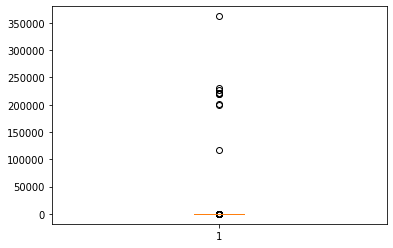

In [24]:
plt.boxplot(x=data['breath_rate_max'])
plt.show()

In [25]:
# 取数据中的最大最小值进行异常值替换
replace_value1 = data['breath_rate_max'][data['breath_rate_max'] < topnum].max()
data.loc[data['breath_rate_max'] > topnum, 'breath_rate_max'] = replace_value1

replace_value2 = data['breath_rate_max'][data['breath_rate_max'] > bottomnum].min()
data.loc[data['breath_rate_max'] < bottomnum, 'breath_rate_max'] = replace_value2

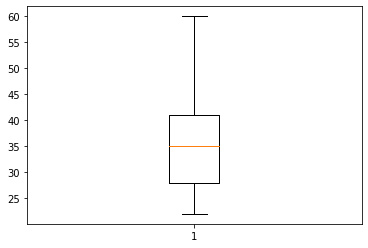

In [26]:
plt.boxplot(x=data['breath_rate_max'])
plt.show()

### breath_rate_min

In [27]:
mean1 = data['breath_rate_min'].quantile(q=0.25)  # 下四分位差
mean2 = data['breath_rate_min'].quantile(q=0.75)  # 上四分位差
mean3 = mean2 - mean1  # 中位差
topnum = mean2 + 1.5*mean3
bottomnum = mean2 - 1.5*mean3
print("正常值的范围：",topnum,bottomnum)
print("是否存在超出正常范围的值：",any(data['breath_rate_min'] > topnum))  # any()函数分别判断数据中是否存在异常值
print("是否存在小于正常范围的值：",any(data['breath_rate_min'] < bottomnum)) # 存在超出正常范围的异常值，不存在小于正常范围的异常值

正常值的范围： 22.0 10.0
是否存在超出正常范围的值： True
是否存在小于正常范围的值： True


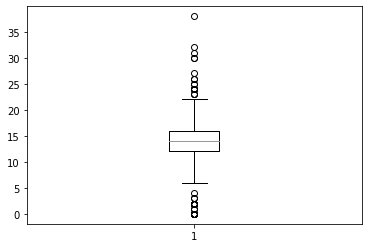

In [28]:
plt.boxplot(x=data['breath_rate_min'])
plt.show()

In [29]:
# 取数据中的最大最小值进行异常值替换
replace_value1 = data['breath_rate_min'][data['breath_rate_min'] < topnum].max()
data.loc[data['breath_rate_min'] > topnum, 'breath_rate_min'] = replace_value1

replace_value2 = data['breath_rate_min'][data['breath_rate_min'] > bottomnum].min()
data.loc[data['breath_rate_min'] < bottomnum, 'breath_rate_min'] = replace_value2

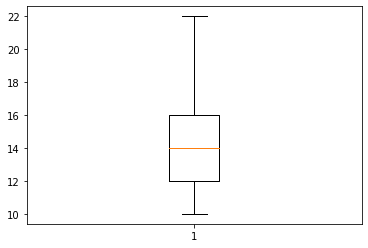

In [30]:
plt.boxplot(x=data['breath_rate_min'])
plt.show()

### heart_rate_max

In [31]:
mean1 = data['heart_rate_max'].quantile(q=0.25)  # 下四分位差
mean2 = data['heart_rate_max'].quantile(q=0.75)  # 上四分位差
mean3 = mean2 - mean1  # 中位差
topnum = mean2 + 1.5*mean3
bottomnum = mean2 - 1.5*mean3
print("正常值的范围：",topnum,bottomnum)
print("是否存在超出正常范围的值：",any(data['heart_rate_max'] > topnum))  # any()函数分别判断数据中是否存在异常值
print("是否存在小于正常范围的值：",any(data['heart_rate_max'] < bottomnum)) # 存在超出正常范围的异常值，不存在小于正常范围的异常值

正常值的范围： 216.5 99.5
是否存在超出正常范围的值： True
是否存在小于正常范围的值： True


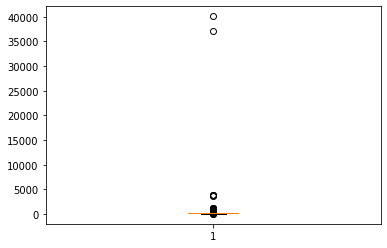

In [32]:
plt.boxplot(x=data['heart_rate_max'])
plt.show()

In [33]:
# 取数据中的最大最小值进行异常值替换
replace_value1 = data['heart_rate_max'][data['heart_rate_max'] < topnum].max()
data.loc[data['heart_rate_max'] > topnum, 'heart_rate_max'] = replace_value1

replace_value2 = data['heart_rate_max'][data['heart_rate_max'] > bottomnum].min()
data.loc[data['heart_rate_max'] < bottomnum, 'heart_rate_max'] = replace_value2

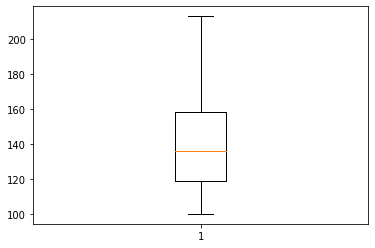

In [34]:
plt.boxplot(x=data['heart_rate_max'])
plt.show()

### heart_rate_min

In [35]:
mean1 = data['heart_rate_min'].quantile(q=0.25)  # 下四分位差
mean2 = data['heart_rate_min'].quantile(q=0.75)  # 上四分位差
mean3 = mean2 - mean1  # 中位差
topnum = mean2 + 1.5*mean3
bottomnum = mean2 - 1.5*mean3
print("正常值的范围：",topnum,bottomnum)
print("是否存在超出正常范围的值：",any(data['heart_rate_min'] > topnum))  # any()函数分别判断数据中是否存在异常值
print("是否存在小于正常范围的值：",any(data['heart_rate_min'] < bottomnum)) # 存在超出正常范围的异常值，不存在小于正常范围的异常值

正常值的范围： 119.5 38.5
是否存在超出正常范围的值： True
是否存在小于正常范围的值： True


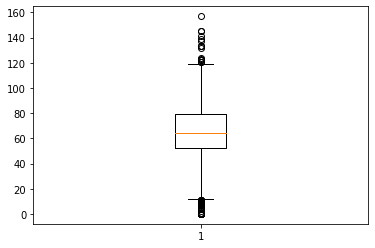

In [36]:
plt.boxplot(x=data['heart_rate_min'])
plt.show()

In [37]:
# 取数据中的最大最小值进行异常值替换
replace_value1 = data['heart_rate_min'][data['heart_rate_min'] < topnum].max()
data.loc[data['heart_rate_min'] > topnum, 'heart_rate_min'] = replace_value1

replace_value2 = data['heart_rate_min'][data['heart_rate_min'] > bottomnum].min()
data.loc[data['heart_rate_min'] < bottomnum, 'heart_rate_min'] = replace_value2

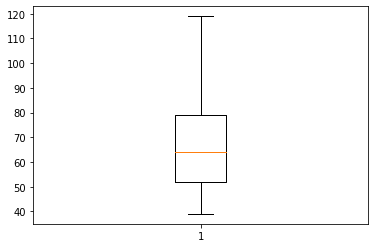

In [38]:
plt.boxplot(x=data['heart_rate_min'])
plt.show()

### systollic_pressure_max

In [39]:
mean1 = data['systollic_pressure_max'].quantile(q=0.25)  # 下四分位差
mean2 = data['systollic_pressure_max'].quantile(q=0.75)  # 上四分位差
mean3 = mean2 - mean1  # 中位差
topnum = mean2 + 1.5*mean3
bottomnum = mean2 - 1.5*mean3
print("正常值的范围：",topnum,bottomnum)
print("是否存在超出正常范围的值：",any(data['systollic_pressure_max'] > topnum))  # any()函数分别判断数据中是否存在异常值
print("是否存在小于正常范围的值：",any(data['systollic_pressure_max'] < bottomnum)) # 存在超出正常范围的异常值，不存在小于正常范围的异常值

正常值的范围： 226.5 121.5
是否存在超出正常范围的值： True
是否存在小于正常范围的值： True


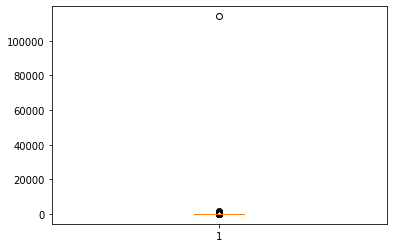

In [40]:
plt.boxplot(x=data['systollic_pressure_max'])
plt.show()

In [41]:
# 取数据中的最大最小值进行异常值替换
replace_value1 = data['systollic_pressure_max'][data['systollic_pressure_max'] < topnum].max()
data.loc[data['systollic_pressure_max'] > topnum, 'systollic_pressure_max'] = replace_value1

replace_value2 = data['systollic_pressure_max'][data['systollic_pressure_max'] > bottomnum].min()
data.loc[data['systollic_pressure_max'] < bottomnum, 'systollic_pressure_max'] = replace_value2

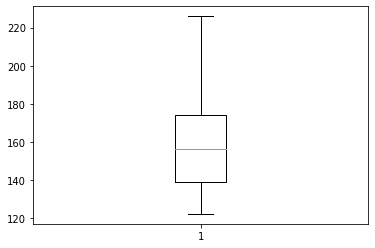

In [42]:
plt.boxplot(x=data['systollic_pressure_max'])
plt.show()

### systollic_pressure_min

In [43]:
mean1 = data['systollic_pressure_min'].quantile(q=0.25)  # 下四分位差
mean2 = data['systollic_pressure_min'].quantile(q=0.75)  # 上四分位差
mean3 = mean2 - mean1  # 中位差
topnum = mean2 + 1.5*mean3
bottomnum = mean2 - 1.5*mean3
print("正常值的范围：",topnum,bottomnum)
print("是否存在超出正常范围的值：",any(data['systollic_pressure_min'] > topnum))  # any()函数分别判断数据中是否存在异常值
print("是否存在小于正常范围的值：",any(data['systollic_pressure_min'] < bottomnum)) # 存在超出正常范围的异常值，不存在小于正常范围的异常值

正常值的范围： 137.5 44.5
是否存在超出正常范围的值： True
是否存在小于正常范围的值： True


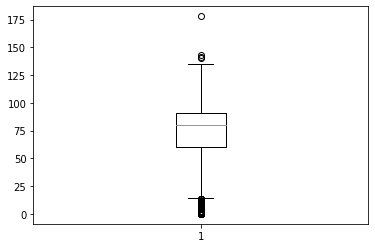

In [44]:
plt.boxplot(x=data['systollic_pressure_min'])
plt.show()

In [45]:
# 取数据中的最大最小值进行异常值替换
replace_value1 = data['systollic_pressure_min'][data['systollic_pressure_min'] < topnum].max()
data.loc[data['systollic_pressure_min'] > topnum, 'systollic_pressure_min'] = replace_value1

replace_value2 = data['systollic_pressure_min'][data['systollic_pressure_min'] > bottomnum].min()
data.loc[data['systollic_pressure_min'] < bottomnum, 'systollic_pressure_min'] = replace_value2

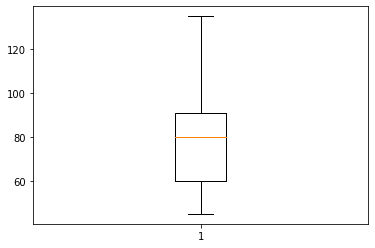

In [46]:
plt.boxplot(x=data['systollic_pressure_min'])
plt.show()

### diastolic_pressure_max

In [47]:
mean1 = data['diastolic_pressure_max'].quantile(q=0.25)  # 下四分位差
mean2 = data['diastolic_pressure_max'].quantile(q=0.75)  # 上四分位差
mean3 = mean2 - mean1  # 中位差
topnum = mean2 + 1.5*mean3
bottomnum = mean2 - 1.5*mean3
print("正常值的范围：",topnum,bottomnum)
print("是否存在超出正常范围的值：",any(data['diastolic_pressure_max'] > topnum))  # any()函数分别判断数据中是否存在异常值
print("是否存在小于正常范围的值：",any(data['diastolic_pressure_max'] < bottomnum)) # 存在超出正常范围的异常值，不存在小于正常范围的异常值

正常值的范围： 151.0 73.0
是否存在超出正常范围的值： True
是否存在小于正常范围的值： True


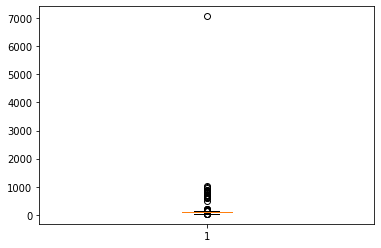

In [48]:
plt.boxplot(x=data['diastolic_pressure_max'])
plt.show()

In [49]:
# 取数据中的最大最小值进行异常值替换
replace_value1 = data['diastolic_pressure_max'][data['diastolic_pressure_max'] < topnum].max()
data.loc[data['diastolic_pressure_max'] > topnum, 'diastolic_pressure_max'] = replace_value1

replace_value2 = data['diastolic_pressure_max'][data['diastolic_pressure_max'] > bottomnum].min()
data.loc[data['diastolic_pressure_max'] < bottomnum, 'diastolic_pressure_max'] = replace_value2

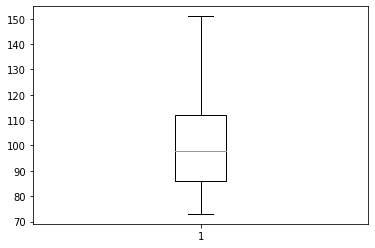

In [50]:
plt.boxplot(x=data['diastolic_pressure_max'])
plt.show()

### diastolic_pressure_min

In [51]:
mean1 = data['diastolic_pressure_min'].quantile(q=0.25)  # 下四分位差
mean2 = data['diastolic_pressure_min'].quantile(q=0.75)  # 上四分位差
mean3 = mean2 - mean1  # 中位差
topnum = mean2 + 1.5*mean3
bottomnum = mean2 - 1.5*mean3
print("正常值的范围：",topnum,bottomnum)
print("是否存在超出正常范围的值：",any(data['diastolic_pressure_min'] > topnum))  # any()函数分别判断数据中是否存在异常值
print("是否存在小于正常范围的值：",any(data['diastolic_pressure_min'] < bottomnum)) # 存在超出正常范围的异常值，不存在小于正常范围的异常值

正常值的范围： 82.0 22.0
是否存在超出正常范围的值： True
是否存在小于正常范围的值： True


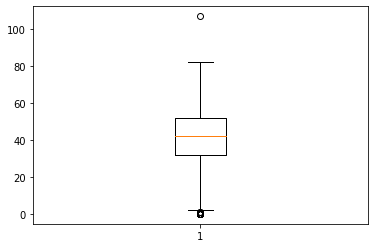

In [52]:
plt.boxplot(x=data['diastolic_pressure_min'])
plt.show()

In [53]:
# 取数据中的最大最小值进行异常值替换
replace_value1 = data['diastolic_pressure_min'][data['diastolic_pressure_min'] < topnum].max()
data.loc[data['diastolic_pressure_min'] > topnum, 'diastolic_pressure_min'] = replace_value1

replace_value2 = data['diastolic_pressure_min'][data['diastolic_pressure_min'] > bottomnum].min()
data.loc[data['diastolic_pressure_min'] < bottomnum, 'diastolic_pressure_min'] = replace_value2

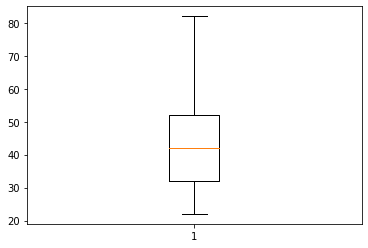

In [54]:
plt.boxplot(x=data['diastolic_pressure_min'])
plt.show()

### oxygen_saturation_min

In [55]:
mean1 = data['oxygen_saturation_min'].quantile(q=0.25)  # 下四分位差
mean2 = data['oxygen_saturation_min'].quantile(q=0.75)  # 上四分位差
mean3 = mean2 - mean1  # 中位差
topnum = mean2 + 1.5*mean3
bottomnum = mean2 - 1.5*mean3
print("正常值的范围：",topnum,bottomnum)
print("是否存在超出正常范围的值：",any(data['oxygen_saturation_min'] > topnum))  # any()函数分别判断数据中是否存在异常值
print("是否存在小于正常范围的值：",any(data['oxygen_saturation_min'] < bottomnum)) # 存在超出正常范围的异常值，不存在小于正常范围的异常值

正常值的范围： 115.5 70.5
是否存在超出正常范围的值： False
是否存在小于正常范围的值： True


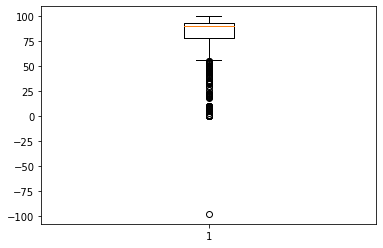

In [56]:
plt.boxplot(x=data['oxygen_saturation_min'])
plt.show()

In [57]:
# 取数据中的最小值进行异常值替换
replace_value2 = data['oxygen_saturation_min'][data['oxygen_saturation_min'] > bottomnum].min()
data.loc[data['oxygen_saturation_min'] < bottomnum, 'oxygen_saturation_min'] = replace_value2

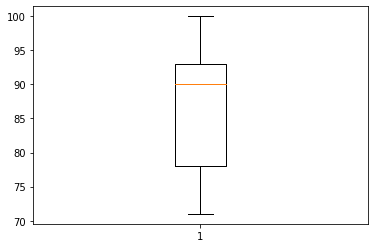

In [58]:
plt.boxplot(x=data['oxygen_saturation_min'])
plt.show()

### oxygen_saturation_max

In [59]:
mean1 = data['oxygen_saturation_max'].quantile(q=0.25)  # 下四分位差
mean2 = data['oxygen_saturation_max'].quantile(q=0.75)  # 上四分位差
mean3 = mean2 - mean1  # 中位差
topnum = mean2 + 1.5*mean3
bottomnum = mean2 - 1.5*mean3
print("正常值的范围：",topnum,bottomnum)
print("是否存在超出正常范围的值：",any(data['oxygen_saturation_max'] > topnum))  # any()函数分别判断数据中是否存在异常值
print("是否存在小于正常范围的值：",any(data['oxygen_saturation_max'] < bottomnum)) # 存在超出正常范围的异常值，不存在小于正常范围的异常值

正常值的范围： 100.0 100.0
是否存在超出正常范围的值： True
是否存在小于正常范围的值： True


In [61]:
# 注意到 正常范围上下界相等 只去掉异常值
data.loc[data['oxygen_saturation_max'] > topnum, 'oxygen_saturation_max'] = 100

In [63]:
outputfile_end = './data_processed/final_end.xlsx'
data.to_excel(outputfile_end)

In [64]:
# min-max标准化
data = data.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
data.head()

,temperature_max,temperature_min,temperature_median,temperature_mean,temperature_std,heart_rate_max,heart_rate_min,heart_rate_median,heart_rate_mean,heart_rate_std,breath_rate_max,breath_rate_min,breath_rate_median,breath_rate_mean,breath_rate_std,systollic_pressure_max,systollic_pressure_min,systollic_pressure_median,systollic_pressure_mean,systollic_pressure_std,diastolic_pressure_max,diastolic_pressure_min,diastolic_pressure_median,diastolic_pressure_mean,diastolic_pressure_std,oxygen_saturation_max,oxygen_saturation_min,oxygen_saturation_median,oxygen_saturation_mean,oxygen_saturation_std,gender,age,RBC,Hemoglobin,Hematocrit,MRBC,MHGBC,MEHGBC,RBCCV,RBCSD,Platelet,WBCC,NNPC,LPPC,MCPC,ESPC,BSPC,NNAV,LPAV,MCAV,ESAV,BSAV,TBB,DBB,IDBB,AST,ALT,AST_ALT,TP,ALB,GLO,WBR,GLU,Urea,Creatinine,EGFR,DSCC,UA,Triglyceride,cholesterol,HDLP,LDLP,AKPP,GLTP,CTKN,LTDD,HBDD,sodium,potassium,chlorine,CO2BF,AG,DSHA,calcium,magnesium,SIPP,TTBA,PRT,INR,APTT,APTTR,TBT,TBTR,Fibrinogen,FDP,FEU,Myoglobin,MCKMB,UNP,Troponin,labels
0,0.342105,0.3625,0.250000,0.241579,0.175415,0.053097,0.0125,0.376176,0.036234,0.001764,0.447368,0.083333,0.285714,0.002636,0.000176,1.000000,0.788889,0.848276,0.775447,0.009069,0.717949,0.283333,0.325758,0.385326,0.075614,1.0,0.241379,0.857143,0.170428,0.001909,1.0,0.709677,0.284247,0.369192,0.015739,0.468018,0.135726,0.101137,0.311424,0.366817,0.048519,0.012806,0.727835,0.174828,0.533788,0.063000,0.007018,0.052819,0.002244,0.032726,0.003054,0.004849,0.019132,0.017193,0.028892,0.003009,0.000945,0.114247,0.521303,0.613909,0.357369,0.233352,0.155813,0.366683,0.581610,0.012787,0.023895,0.115568,0.009340,0.028986,0.022451,0.025610,0.048703,0.030062,0.001024,0.018616,0.046882,0.606749,0.196080,0.340439,0.322126,0.360568,0.016196,0.345404,0.308546,0.467,0.045062,0.035111,0.007043,0.179392,0.009437,0.097954,0.007531,0.059016,0.073548,0.040074,0.138615,0.002246,1.000000,0.015441,1.0
1,0.328947,0.2500,0.233333,0.237498,0.283707,0.000000,0.1375,0.376176,0.034157,0.000644,0.052632,0.333333,0.228571,0.001658,0.000109,0.346154,0.188889,0.689655,0.597522,0.006186,0.500000,0.350000,0.295455,0.324092,0.043618,1.0,0.724138,0.843537,0.169629,0.001161,0.0,0.924731,0.393836,0.511124,0.022499,0.497466,0.113292,0.063597,0.199531,0.552724,0.247180,0.027476,0.936082,0.040345,0.204429,0.000000,0.000000,0.140753,0.001288,0.028504,0.000000,0.000000,0.004763,0.003564,0.014446,0.000908,0.000181,0.066532,0.461265,0.532374,0.326071,0.228230,0.084596,0.069410,0.020080,0.404575,0.002098,0.074840,0.006981,0.026060,0.025417,0.026913,0.021123,0.006500,0.000091,0.001570,0.002761,0.604732,0.147796,0.250646,0.859002,0.024867,0.005441,0.367688,0.279689,0.212,0.010216,0.017059,0.001354,0.005587,0.000267,0.047840,0.004770,0.065705,0.032258,0.044819,0.004830,0.000373,0.095357,0.001630,1.0
2,0.302632,0.3750,0.350000,0.276065,0.217434,0.000000,0.1500,0.347962,0.035622,0.001724,0.052632,0.500000,0.285714,0.002894,0.000081,0.634615,0.466667,0.896552,0.749698,0.008731,0.089744,0.016667,0.356061,0.339986,0.076799,1.0,0.896552,0.843537,0.170370,0.000514,1.0,0.731183,0.301370,0.369192,0.019013,0.603910,0.119462,0.040411,0.379108,0.306847,0.052921,0.020218,0.961856,0.034138,0.071550,0.000000,0.002632,0.106967,0.000751,0.007918,0.000000,0.003636,0.006539,0.004822,0.017456,0.004882,0.001528,0.058468,0.345094,0.482014,0.214535,0.327262,0.302577,0.097735,0.048111,0.346586,0.004616,0.065950,0.006025,0.030112,0.029123,0.028215,0.013900,0.013162,0.000188,0.005233,0.011681,0.688626,0.165461,0.299742,0.959870,0.065719,0.078198,0.330084,0.264151,0.119,0.007605,0.011644,0.000542,0.021415,0.001068,0.051552,0.004979,0.077016,0.002581,0.016873,0.006645,0.000349,0.039554,0.003666,1.0
3,0.236842,0.4000,0.250000,0.248470,0.073719,0.000000,0.2125,0.357367,0.032801,0.000447,0.000000,0.333333,0.171429,0.001225,0.000054,0.000000,0.288889,0.334483,0.329016,0.002978,0.012821,0.216667,0.136364,0.130611,0.019181,1.0,1.000000,0.857143,0.173156,0.000000,0.0,0.537634,0.160470,0.168122,0.009190,0.543085,0.

In [65]:
outputfile = './data_processed/final_end_StandardScaler.xlsx'
data.to_excel(outputfile)

## Check target distribution

In [52]:
np.round(data['labels'].value_counts()*100/len(data['labels']), 2)

1    71.57
0    28.43
Name: labels, dtype: float64

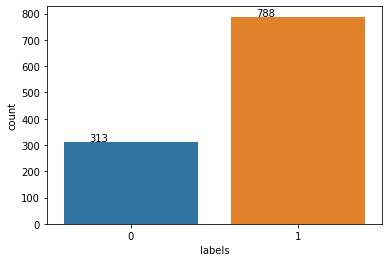

In [54]:
import seaborn as sns
ax = sns.countplot(data['labels'])
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

# Help Functions

In [8]:
# 自定义混淆矩阵
def cm_plot(y_test, y_predict):
        cm = confusion_matrix(y_test, y_predict)

        plt.matshow(cm, cmap=plt.cm.Greens)
        plt.colorbar()

        for x in range(len(cm)):
            for y in range(len(cm)):
                plt.annotate(
                    cm[x, y],
                    xy=(x, y),
                    horizontalalignment='center',
                    verticalalignment='center')

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        return plt

In [9]:
# ROC curve
def roc_plot(y_test, y_predict_probs):
    fpr, tpr, thresholds = roc_curve(y_test, y_predict_probs)
    roc_auc = auc(fpr, tpr)  # auc为Roc曲线下的面积

    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.xlabel('False Positive Rate') # 横坐标是fpr
    plt.ylabel('True Positive Rate')  # 纵坐标是tpr
    plt.title('Receiver operating characteristic example')
    return plt

In [ ]:
def count_plot(col_name, fig_size=(10,10)):
    """
    Helper function for count plot. 
    Here in count plot I have ordered by train[col].value_counts so it is easy compare distribution between train and test
    """
    fig = plt.figure(figsize=fig_size)
    fig.add_subplot(2,1,1)            
    ax1 = sns.countplot(x=col_name, data=train, order = train[col_name].value_counts().index)
    for p in ax1.patches:
        ax1.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
    ax1.set_title("Train distribution", fontsize='large')
    ax1.set_ylabel(col_name)
    fig.add_subplot(2,1,2)            
    ax2 = sns.countplot(x=col_name, data=test, order = train[col_name].value_counts().index)
    ax2.set_title("Test distribution", fontsize='large')
    ax2.set_ylabel(col_name)
    for p in ax2.patches:
        ax2.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
    
    plt.show()   

# Model_building

## Read and Split Data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm
from sklearn.model_selection import GridSearchCV,StratifiedKFold, KFold
from sklearn.metrics import accuracy_score,roc_auc_score,recall_score,precision_score,balanced_accuracy_score,auc
from sklearn.metrics import confusion_matrix,classification_report,roc_curve
from sklearn.externals import joblib

#pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_rows', 500)


inputfile = './data_processed/final_end_StandardScaler.xlsx'
data = pd.read_excel(inputfile)
data = data[data.columns[1:]]
data.head()

d:\python3.6.0\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


,temperature_max,temperature_min,temperature_median,temperature_mean,temperature_std,heart_rate_max,heart_rate_min,heart_rate_median,heart_rate_mean,heart_rate_std,...,TBT,TBTR,Fibrinogen,FDP,FEU,Myoglobin,MCKMB,UNP,Troponin,labels
0,0.342105,0.3625,0.250000,0.241579,0.175415,0.053097,0.0125,0.376176,0.036234,0.001764,...,0.097954,0.007531,0.059016,0.073548,0.040074,0.138615,0.002246,1.000000,0.015441,1
1,0.328947,0.2500,0.233333,0.237498,0.283707,0.000000,0.1375,0.376176,0.034157,0.000644,...,0.047840,0.004770,0.065705,0.032258,0.044819,0.004830,0.000373,0.095357,0.001630,1
2,0.302632,0.3750,0.350000,0.276065,0.217434,0.000000,0.1500,0.347962,0.035622,0.001724,...,0.051552,0.004979,0.077016,0.002581,0.016873,0.006645,0.000349,0.039554,0.003666,1
3,0.236842,0.4000,0.250000,0.248470,0.073719,0.000000,0.2125,0.357367,0.032801,0.000447,...,0.064081,0.005649,0.022131,0.024516,0.006459,0.150750,0.004567,0.201145,0.017056,1
4,0.368421,0.3500,0.283333,0.256154,0.221669,0.814159,0.4125,0.689655,0.062209,0.002840,...,0.057120,0.005251,0.075393,0.110968,0.146915,0.016153,0.000250,0.035668,0.000950,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Columns: 101 entries, temperature_max to labels
dtypes: float64(99), int64(2)
memory usage: 868.9 KB


In [3]:
X = data.iloc[:, 0:100]
y = data.iloc[:, 100]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020, stratify=y)  # 保证分割后y的比例分布与原数据一致

data.shape, X_train.shape, X_test.shape

((1101, 101), (880, 100), (221, 100))

In [4]:
y_test.value_counts()

1    158
0     63
Name: labels, dtype: int64

## LogisticRegression

In [5]:

lr = LR(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
        intercept_scaling=1, class_weight='balanced', random_state=1, solver='liblinear', 
        max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

lr.fit(X_train, y_train)

lr_y_predict = lr.predict(X_test)
lr_y_probs = lr.predict_proba(X_test) # model score

train_lr_y_score = lr.score(X_train, y_train)
test_lr_y_score = lr.score(X_test, y_test)
print("Accuracy of LR Classifier(Train): {score}".format(score=train_lr_y_score))
print("Accuracy of LR Classifier(Test): {score}".format(score=test_lr_y_score))

Accuracy of LR Classifier(Train): 0.8068181818181818
Accuracy of LR Classifier(Test): 0.746606334841629


In [6]:
print("LR Classifier: ")
print("ACCURACY         : {score}".format(score=accuracy_score(y_test, lr_y_predict)))           # 准确率
print("AUC              : {score}".format(score=roc_auc_score(y_test, lr_y_probs[:, 1])))        # AUC
print("RECALL           : {score}".format(score=recall_score(y_test, lr_y_predict)))             # 召回率
print("PRECISION        : {score}".format(score=precision_score(y_test, lr_y_predict)))          # 正确率
print("BALANCED_ACCURACY: {score}".format(score=balanced_accuracy_score(y_test, lr_y_predict)))  # 平衡精度

LR Classifier: 
ACCURACY         : 0.746606334841629
AUC              : 0.8280088406670686
RECALL           : 0.7658227848101266
PRECISION        : 0.8642857142857143
BALANCED_ACCURACY: 0.7321177416114124


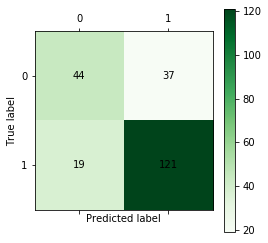

In [10]:
cm_plot(y_test, lr_y_predict).show()

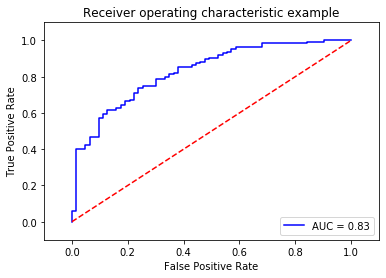

In [11]:
roc_plot(y_test, lr_y_probs[:, 1]).show()

In [12]:
col_name = data.columns[:-1]

m = {}
for i in range(len(col_name)):
    m.setdefault(col_name[i], 0)
    m[col_name[i]] = lr.coef_[0][i]
    
sorted(m.items(), key=lambda x: x[1], reverse=True)

[('oxygen_saturation_median', 3.0299924069638826),
 ('temperature_median', 2.5945933858872974),
 ('CO2BF', 1.9666330675777257),
 ('oxygen_saturation_min', 1.442431309734488),
 ('diastolic_pressure_min', 1.4228826244049344),
 ('breath_rate_std', 0.9591048164356516),
 ('temperature_std', 0.8653574449063676),
 ('SIPP', 0.7734906966529672),
 ('Creatinine', 0.6541841019217435),
 ('breath_rate_max', 0.538352178924539),
 ('systollic_pressure_max', 0.5081220221714021),
 ('systollic_pressure_min', 0.4738777967794824),
 ('CTKN', 0.3990409998771052),
 ('DSHA', 0.35461051821565537),
 ('NNPC', 0.25823372951524454),
 ('WBR', 0.03438942091048822),
 ('Platelet', 0.033261287128042515),
 ('temperature_max', 0.0),
 ('temperature_mean', 0.0),
 ('heart_rate_min', 0.0),
 ('heart_rate_mean', 0.0),
 ('heart_rate_std', 0.0),
 ('breath_rate_mean', 0.0),
 ('systollic_pressure_median', 0.0),
 ('systollic_pressure_mean', 0.0),
 ('systollic_pressure_std', 0.0),
 ('diastolic_pressure_median', 0.0),
 ('diastolic_pres

In [11]:
# save model
joblib.dump(lr, './models/LR.pkl')

['./models/LR.pkl']

## KNeighborsClassifier

In [15]:

knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

knn.fit(X_train, y_train)

knn_y_predict = knn.predict(X_test)
knn_y_probs = knn.predict_proba(X_test) # model score

train_knn_y_score = knn.score(X_train, y_train)
test_knn_y_score = knn.score(X_test, y_test)
print("Accuracy of KNeighborsClassifier(Train): {score}".format(score=train_knn_y_score)) 
print("Accuracy of KNeighborsClassifier(Test): {score}".format(score=test_knn_y_score))

Accuracy of KNeighborsClassifier(Train): 0.8829545454545454
Accuracy of KNeighborsClassifier(Test): 0.7963800904977375


In [16]:
print("KNN Classifier: ")
print("ACCURACY         : {score}".format(score=accuracy_score(y_test, knn_y_predict)))           # 准确率
print("AUC              : {score}".format(score=roc_auc_score(y_test, knn_y_probs[:, 1])))        # AUC
print("RECALL           : {score}".format(score=recall_score(y_test, knn_y_predict)))             # 召回率
print("PRECISION        : {score}".format(score=precision_score(y_test, knn_y_predict)))          # 正确率
print("BALANCED_ACCURACY: {score}".format(score=balanced_accuracy_score(y_test, knn_y_predict)))  # 平衡精度

KNN Classifier: 
ACCURACY         : 0.7963800904977375
AUC              : 0.7738095238095238
RECALL           : 0.9113924050632911
PRECISION        : 0.8228571428571428
BALANCED_ACCURACY: 0.7096644564998995


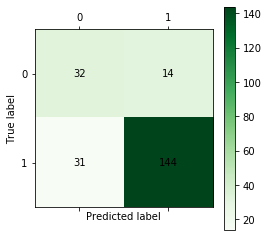

In [17]:
cm_plot(y_test, knn_y_predict).show()

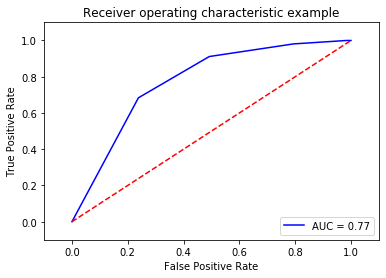

In [18]:
roc_plot(y_test, knn_y_probs[:, 1]).show()

In [16]:
joblib.dump(knn, './models/KNN.pkl')

['./models/KNN.pkl']

## SVC

In [19]:

svc = SVC(C=2.2, cache_size=200, class_weight=None, coef0=0.0,
        decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
        kernel='linear', max_iter=-1, probability=True, random_state=None,
        shrinking=True, tol=0.001, verbose=False)

svc.fit(X_train, y_train)

svc_y_predict = svc.predict(X_test)
svc_y_probs = svc.predict_proba(X_test) # 模型的预测得分

train_svc_y_score = svc.score(X_train, y_train)
test_svc_y_score = svc.score(X_test, y_test)
print("Accuracy of SVC Classifier(Train): {score}".format(score=train_svc_y_score))
print("Accuracy of SVC Classifier(Test): {score}".format(score=test_svc_y_score))

Accuracy of SVC Classifier(Train): 0.8636363636363636
Accuracy of SVC Classifier(Test): 0.7963800904977375


In [20]:
print("SVC Classifier: ")
print("ACCURACY         : {score}".format(score=accuracy_score(y_test, svc_y_predict)))           # 准确率
print("AUC              : {score}".format(score=roc_auc_score(y_test, svc_y_probs[:, 1])))        # AUC
print("RECALL           : {score}".format(score=recall_score(y_test, svc_y_predict)))             # 召回率
print("PRECISION        : {score}".format(score=precision_score(y_test, svc_y_predict)))          # 正确率
print("BALANCED_ACCURACY: {score}".format(score=balanced_accuracy_score(y_test, svc_y_predict)))  # 平衡精度

SVC Classifier: 
ACCURACY         : 0.7963800904977375
AUC              : 0.8332328712075547
RECALL           : 0.8987341772151899
PRECISION        : 0.8304093567251462
BALANCED_ACCURACY: 0.7192083584488648


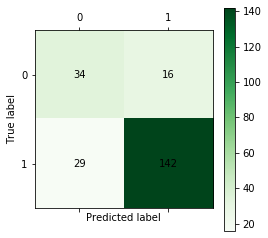

In [21]:
cm_plot(y_test, svc_y_predict).show()

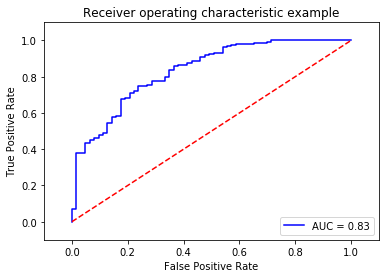

In [22]:
roc_plot(y_test, svc_y_probs[:, 1]).show()

In [21]:
joblib.dump(svc, './models/SVC.pkl')

['./models/SVC.pkl']

## DecisionTreeClassifier

In [23]:
tree = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

tree.fit(X_train, y_train)

tree_y_predict = tree.predict(X_test)
tree_y_probs = tree.predict_proba(X_test)

train_tree_y_score = tree.score(X_train, y_train)
test_tree_y_score = tree.score(X_test, y_test)
print("Accuracy of DecisionTreeClassifier(Train): {score}".format(score=train_tree_y_score))
print("Accuracy of DecisionTreeClassifier(Test): {score}".format(score=test_tree_y_score))

Accuracy of DecisionTreeClassifier(Train): 1.0
Accuracy of DecisionTreeClassifier(Test): 0.746606334841629


In [23]:
print("DecisionTreeClassifier: ")
print("ACCURACY         : {score}".format(score=accuracy_score(y_test, tree_y_predict)))           # 准确率
print("AUC              : {score}".format(score=roc_auc_score(y_test, tree_y_probs[:, 1])))        # AUC
print("RECALL           : {score}".format(score=recall_score(y_test, tree_y_predict)))             # 召回率
print("PRECISION        : {score}".format(score=precision_score(y_test, tree_y_predict)))          # 正确率
print("BALANCED_ACCURACY: {score}".format(score=balanced_accuracy_score(y_test, tree_y_predict)))  # 平衡精度

DecisionTreeClassifier: 
ACCURACY         : 0.832579185520362
AUC              : 0.7889776003548459
RECALL           : 0.874251497005988
PRECISION        : 0.9012345679012346
BALANCED_ACCURACY: 0.7889776003548459


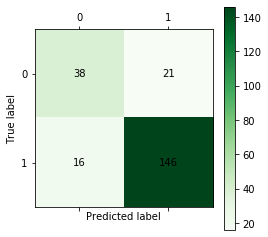

In [24]:
cm_plot(y_test, tree_y_predict).show()

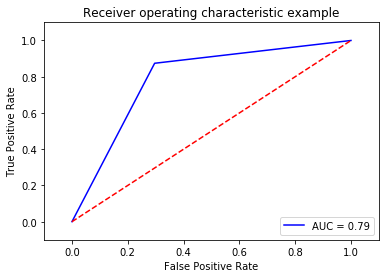

In [25]:
roc_plot(y_test, tree_y_probs[:, 1]).show()

In [26]:
joblib.dump(tree, './models/TREE.pkl')

['./models/TREE.pkl']

## RandomForestClassifier

In [24]:

rf = RandomForestClassifier(n_estimators= 93, max_depth=5, min_samples_split=53,
                            min_samples_leaf=14, max_features='sqrt', oob_score=True, random_state=10)

rf.fit(X_train, y_train)

rf_y_predict = rf.predict(X_test)
rf_y_probs = rf.predict_proba(X_test) # 模型的预测得分

train_rf_y_score = rf.score(X_train, y_train)
test_rf_y_score = rf.score(X_test, y_test)
print("Accuracy of RandomForestClassifier(Train): {score}".format(score=train_rf_y_score)) 
print("Accuracy of RandomForestClassifier(Test): {score}".format(score=test_rf_y_score))

Accuracy of RandomForestClassifier(Train): 0.8977272727272727
Accuracy of RandomForestClassifier(Test): 0.8642533936651584


In [25]:
print("RandomForestClassifier: ")
print("ACCURACY         : {score}".format(score=accuracy_score(y_test, rf_y_predict)))           # 准确率
print("AUC              : {score}".format(score=roc_auc_score(y_test, rf_y_probs[:, 1])))        # AUC (在偏态的样本中更稳健)
print("RECALL           : {score}".format(score=recall_score(y_test, rf_y_predict)))             # 召回率
print("PRECISION        : {score}".format(score=precision_score(y_test, rf_y_predict)))          # 正确率
print("BALANCED_ACCURACY: {score}".format(score=balanced_accuracy_score(y_test, rf_y_predict)))  # 平衡精度

RandomForestClassifier: 
ACCURACY         : 0.8642533936651584
AUC              : 0.8895921237693389
RECALL           : 0.9746835443037974
PRECISION        : 0.8555555555555555
BALANCED_ACCURACY: 0.7809925658026924


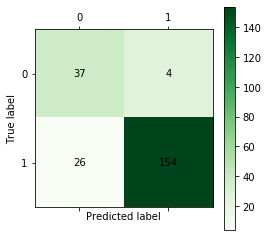

In [26]:
cm_plot(y_test, rf_y_predict).show()

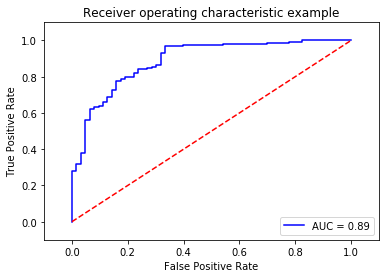

In [27]:
roc_plot(y_test, rf_y_probs[:, 1]).show()

In [28]:
joblib.dump(rf, './models/RF.pkl')

['./models/RF.pkl']

## AdaBoostClassifier

In [29]:

abc = AdaBoostClassifier(base_estimator=None, n_estimators=97, learning_rate=1.0, algorithm='SAMME.R', random_state=10)

abc.fit(X_train, y_train)

abc_y_predict = abc.predict(X_test)
abc_y_probs = abc.predict_proba(X_test)

train_abc_y_score = abc.score(X_train, y_train)
test_abc_y_score = abc.score(X_test, y_test)
print("Accuracy of AdaBoostClassifier(Train): {score}".format(score=train_abc_y_score)) 
print("Accuracy of AdaBoostClassifier(Test): {score}".format(score=test_abc_y_score)) 

Accuracy of AdaBoostClassifier(Train): 0.9954545454545455
Accuracy of AdaBoostClassifier(Test): 0.8823529411764706


In [30]:
print("AdaBoostClassifier: ")
print("ACCURACY         : {score}".format(score=accuracy_score(y_test, abc_y_predict)))           # 准确率
print("AUC              : {score}".format(score=roc_auc_score(y_test, abc_y_probs[:, 1])))        # AUC
print("RECALL           : {score}".format(score=recall_score(y_test, abc_y_predict)))             # 召回率
print("PRECISION        : {score}".format(score=precision_score(y_test, abc_y_predict)))          # 正确率
print("BALANCED_ACCURACY: {score}".format(score=balanced_accuracy_score(y_test, abc_y_predict)))  # 平衡精度

AdaBoostClassifier: 
ACCURACY         : 0.8823529411764706
AUC              : 0.9369097850110508
RECALL           : 0.9240506329113924
PRECISION        : 0.9125
BALANCED_ACCURACY: 0.8509142053445851


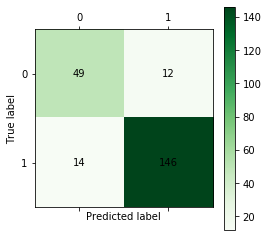

In [31]:
cm_plot(y_test, abc_y_predict).show()

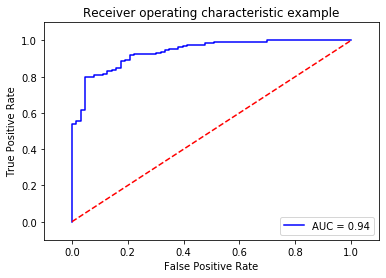

In [32]:
roc_plot(y_test, abc_y_probs[:, 1]).show()

In [36]:
joblib.dump(abc, './models/ABC.pkl')

['./models/ABC.pkl']

## GradientBoostingClassifier

In [33]:

gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=114, max_depth=11, max_features=10, 
                                  min_samples_leaf=54, min_samples_split=48, random_state=10)

gbc.fit(X_train, y_train)

gbc_y_predict = gbc.predict(X_test)
gbc_y_probs = gbc.predict_proba(X_test)

train_gbc_y_score = gbc.score(X_train, y_train)
test_gbc_y_score = gbc.score(X_test, y_test)
print("Accuracy of AdaBoostClassifier(Train): {score}".format(score=train_gbc_y_score)) 
print("Accuracy of AdaBoostClassifier(Test): {score}".format(score=test_gbc_y_score))

Accuracy of AdaBoostClassifier(Train): 1.0
Accuracy of AdaBoostClassifier(Test): 0.8914027149321267


In [34]:
print("GradientBoostingClassifier: ")
print("ACCURACY         : {score}".format(score=accuracy_score(y_test, gbc_y_predict)))           # 准确率
print("AUC              : {score}".format(score=roc_auc_score(y_test, gbc_y_probs[:, 1])))        # AUC
print("RECALL           : {score}".format(score=recall_score(y_test, gbc_y_predict)))             # 召回率
print("PRECISION        : {score}".format(score=precision_score(y_test, gbc_y_predict)))          # 正确率
print("BALANCED_ACCURACY: {score}".format(score=balanced_accuracy_score(y_test, gbc_y_predict)))  # 平衡精度

GradientBoostingClassifier: 
ACCURACY         : 0.8914027149321267
AUC              : 0.9416315049226441
RECALL           : 0.9493670886075949
PRECISION        : 0.9036144578313253
BALANCED_ACCURACY: 0.8476994173196705


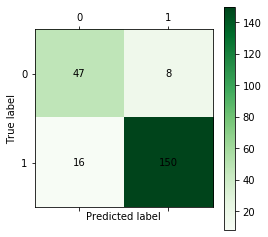

In [35]:
cm_plot(y_test, gbc_y_predict).show()

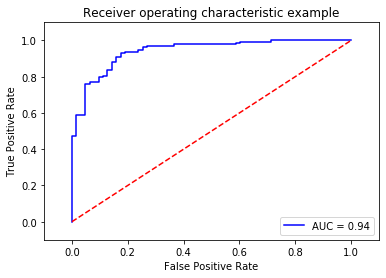

In [36]:
roc_plot(y_test, gbc_y_probs[:, 1]).show()

In [41]:
joblib.dump(gbc, './models/GBC.pkl')

['./models/GBC.pkl']

## GaussianNB

In [37]:

gnb = GaussianNB()

gnb.fit(X_train, y_train)

gnb_y_predict = gnb.predict(X_test)
gnb_y_probs = gnb.predict_proba(X_test)

train_gnb_y_score = gnb.score(X_train, y_train)
test_gnb_y_score = gnb.score(X_test, y_test)
print("Accuracy of AdaBoostClassifier(Train): {score}".format(score=train_gnb_y_score)) 
print("Accuracy of AdaBoostClassifier(Test): {score}".format(score=test_gnb_y_score)) 

Accuracy of AdaBoostClassifier(Train): 0.8011363636363636
Accuracy of AdaBoostClassifier(Test): 0.755656108597285


In [38]:
print("GaussianNB: ")
print("ACCURACY         : {score}".format(score=accuracy_score(y_test, gnb_y_predict)))           # 准确率
print("AUC              : {score}".format(score=roc_auc_score(y_test, gnb_y_probs[:, 1])))        # AUC
print("RECALL           : {score}".format(score=recall_score(y_test, gnb_y_predict)))             # 召回率
print("PRECISION        : {score}".format(score=precision_score(y_test, gnb_y_predict)))          # 正确率
print("BALANCED_ACCURACY: {score}".format(score=balanced_accuracy_score(y_test, gnb_y_predict)))  # 平衡精度

GaussianNB: 
ACCURACY         : 0.755656108597285
AUC              : 0.8163552340767529
RECALL           : 0.810126582278481
PRECISION        : 0.8421052631578947
BALANCED_ACCURACY: 0.71458710066305


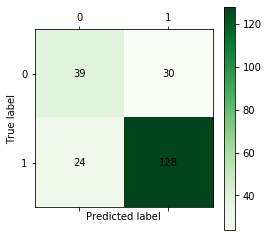

In [39]:
cm_plot(y_test, gnb_y_predict).show()

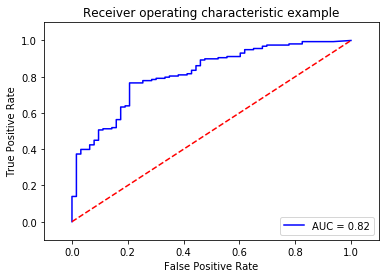

In [40]:
roc_plot(y_test, gnb_y_probs[:, 1]).show()

In [46]:
joblib.dump(gnb, './models/GNB.pkl')

['./models/GNB.pkl']

## Results_Compare

In [41]:
# 五折交叉验证结果对比

results_lr = []
for my_score in ['accuracy', 'roc_auc', 'recall', 'precision', 'balanced_accuracy']:
        #print(cross_val_score(lr, X, y, cv=5, scoring=my_score).mean())
        results_lr.append(cross_val_score(lr, X, y, cv=5, scoring=my_score).mean())

results_knn = []
for my_score in ['accuracy', 'roc_auc', 'recall', 'precision', 'balanced_accuracy']:
        results_knn.append(cross_val_score(knn, X, y, cv=5, scoring=my_score).mean())
        
results_svc = []
for my_score in ['accuracy', 'roc_auc', 'recall', 'precision', 'balanced_accuracy']:
        results_svc.append(cross_val_score(svc, X, y, cv=5, scoring=my_score).mean())
        
results_tree = []
for my_score in ['accuracy', 'roc_auc', 'recall', 'precision', 'balanced_accuracy']:
        results_tree.append(cross_val_score(tree, X, y, cv=5, scoring=my_score).mean())
        
results_rf = []
for my_score in ['accuracy', 'roc_auc', 'recall', 'precision', 'balanced_accuracy']:
        results_rf.append(cross_val_score(rf, X, y, cv=5, scoring=my_score).mean())
        
results_abc = []
for my_score in ['accuracy', 'roc_auc', 'recall', 'precision', 'balanced_accuracy']:
        results_abc.append(cross_val_score(abc, X, y, cv=5, scoring=my_score).mean())
        
results_gbc = []
for my_score in ['accuracy', 'roc_auc', 'recall', 'precision', 'balanced_accuracy']:
        results_gbc.append(cross_val_score(gbc, X, y, cv=5, scoring=my_score).mean())
        
results_gnb = []
for my_score in ['accuracy', 'roc_auc', 'recall', 'precision', 'balanced_accuracy']:
        results_gnb.append(cross_val_score(gnb, X, y, cv=5, scoring=my_score).mean())   

In [42]:
results_lgb = [0.9049773755656109, 0.9479606188466948, 0.9620253164556962, 0.9101796407185628, 0.861965039180229]
results = [results_lr, results_knn, results_svc, results_tree, results_rf, results_abc, results_gbc, results_gnb, results_lgb]

In [43]:
# 用表格展示
results_compare = pd.DataFrame(results)
results_compare.columns = ['ACCURACY(mean)', 'AUC(mean)', 'RECALL(mean)', 'PRECISION(mean)', 'BALANCED_ACCURACY(mean)']
results_compare.index = ['LR Classifier', 'KNN Classifier', 'SVC Classifier', 'DecisionTreeClassifier',
                        'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'GaussianNB', 'LightGBM']

In [44]:
# 高亮最大值
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color:yellow' if v else '' for v in is_max]

results_compare.style.apply(highlight_max)

,ACCURACY(mean),AUC(mean),RECALL(mean),PRECISION(mean),BALANCED_ACCURACY(mean)
LR Classifier,0.772082,0.833468,0.793284,0.878278,0.755807
KNN Classifier,0.79019,0.764056,0.91756,0.814766,0.693445
SVC Classifier,0.810099,0.831854,0.927695,0.829018,0.720709
DecisionTreeClassifier,0.759264,0.703603,0.8325,0.831248,0.703603
RandomForestClassifier,0.842778,0.893314,0.969548,0.838268,0.746448
AdaBoostClassifier,0.856443,0.896696,0.909909,0.892142,0.815784
GradientBoostingClassifier,0.877241,0.922482,0.94923,0.889042,0.822439
GaussianNB,0.774607,0.80361,0.86675,0.828862,0.704496
LightGBM,0.904977,0.947961,0.962025,0.91018,0.861965


## LightGBM

In [45]:
# Parameters
params = {"objective": "binary", 
          "boosting": "gbdt",
          "metric": {"binary_logloss", "auc"},
          "max_depth": 2,
          "n_jobs":-1,
          "verbose":-1}

num_folds = 5
roc_auc = list()
feature_importances = pd.DataFrame()
feature_importances['feature'] = X_train.columns
pred_on_test = np.zeros(X_test.shape[0])


kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=2020)
for index, (train_index, valid_index) in enumerate(kf.split(X=X_train, y=y_train)):
    print(f"FOLD {index+1}")

    X_train_fold, y_train_fold = X_train.iloc[train_index], y_train.iloc[train_index]
    X_valid_fold, y_valid_fold = X_train.iloc[valid_index], y_train.iloc[valid_index]

    dtrain = lightgbm.Dataset(X_train_fold, label=y_train_fold)
    dvalid = lightgbm.Dataset(X_valid_fold, label=y_valid_fold)

    lgb = lightgbm.train(params=params, train_set=dtrain, num_boost_round=2000, 
                         valid_sets=[dtrain, dvalid], verbose_eval=250, early_stopping_rounds=500)

    feature_importances[f'fold_{index + 1}'] = lgb.feature_importance()

    y_valid_pred = (lgb.predict(X_valid_fold, num_iteration=lgb.best_iteration))
    pred_on_test += (lgb.predict(X_test, num_iteration=lgb.best_iteration)) / num_folds

    # winsorization
    y_valid_pred = np.clip(a=y_valid_pred, a_min=0, a_max=1)
    pred_on_test = np.clip(a=pred_on_test, a_min=0, a_max=1)

    print(f"FOLD {index+1}: ROC_AUC  => {np.round(roc_auc_score(y_true=y_valid_fold, y_score=y_valid_pred),5)}")
    roc_auc.append(roc_auc_score(y_true=y_valid_fold, y_score=y_valid_pred)/num_folds)
    
print(f"Mean roc_auc for {num_folds} folds: {np.round(sum(roc_auc),5)}")

FOLD 1
Training until validation scores don't improve for 500 rounds
[250]	training's auc: 1	training's binary_logloss: 0.046248	valid_1's auc: 0.924286	valid_1's binary_logloss: 0.33364
[500]	training's auc: 1	training's binary_logloss: 0.00885741	valid_1's auc: 0.928889	valid_1's binary_logloss: 0.373045
Early stopping, best iteration is:
[97]	training's auc: 0.998046	training's binary_logloss: 0.142575	valid_1's auc: 0.925873	valid_1's binary_logloss: 0.313771
FOLD 1: ROC_AUC  => 0.92587
FOLD 2
Training until validation scores don't improve for 500 rounds
[250]	training's auc: 1	training's binary_logloss: 0.0472794	valid_1's auc: 0.945079	valid_1's binary_logloss: 0.270835
[500]	training's auc: 1	training's binary_logloss: 0.00894337	valid_1's auc: 0.94619	valid_1's binary_logloss: 0.312514
[750]	training's auc: 1	training's binary_logloss: 0.00188981	valid_1's auc: 0.945714	valid_1's binary_logloss: 0.364755
Early stopping, best iteration is:
[262]	training's auc: 1	training's bina

In [46]:
# 五折交叉验证平均预测结果  
threshold = 0.5
lgb_y_predict = []

for pred in pred_on_test:  
    result = 1 if pred > threshold else 0
    lgb_y_predict.append(result)

In [47]:
print(lgb_y_predict)

[0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1]


In [48]:
pd.Series(lgb_y_predict).value_counts()

1    167
0     54
dtype: int64

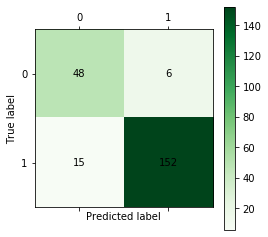

In [49]:
cm_plot(y_test, lgb_y_predict).show()

In [50]:
print("lightgbm: ")
print("ACCURACY         : {score}".format(score=accuracy_score(y_test, lgb_y_predict)))           # 准确率
print("AUC              : {score}".format(score=roc_auc_score(y_test, pred_on_test)))            # AUC
print("RECALL           : {score}".format(score=recall_score(y_test, lgb_y_predict)))             # 召回率
print("PRECISION        : {score}".format(score=precision_score(y_test, lgb_y_predict)))          # 正确率
print("BALANCED_ACCURACY: {score}".format(score=balanced_accuracy_score(y_test, lgb_y_predict)))  # 平衡精度

lightgbm: 
ACCURACY         : 0.9049773755656109
AUC              : 0.9479606188466948
RECALL           : 0.9620253164556962
PRECISION        : 0.9101796407185628
BALANCED_ACCURACY: 0.861965039180229


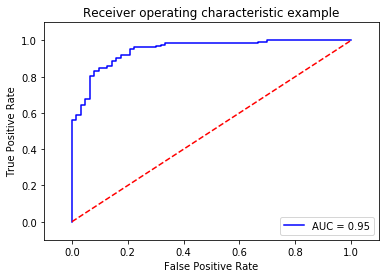

In [51]:
roc_plot(y_test, pred_on_test).show()  

In [52]:
def plot_feature_importance(df, k_fold_object):
    df['average_feature_imp'] = df[['fold_{}'.format(fold + 1) for fold in range(k_fold_object.n_splits)]].mean(axis=1)
    plt.figure(figsize=(10, 40))
    sns.barplot(data=df.sort_values(by='average_feature_imp', ascending=False), x='average_feature_imp', y='feature');
    plt.title('Feature importance over {} folds average'.format(k_fold_object.n_splits))
    plt.show()

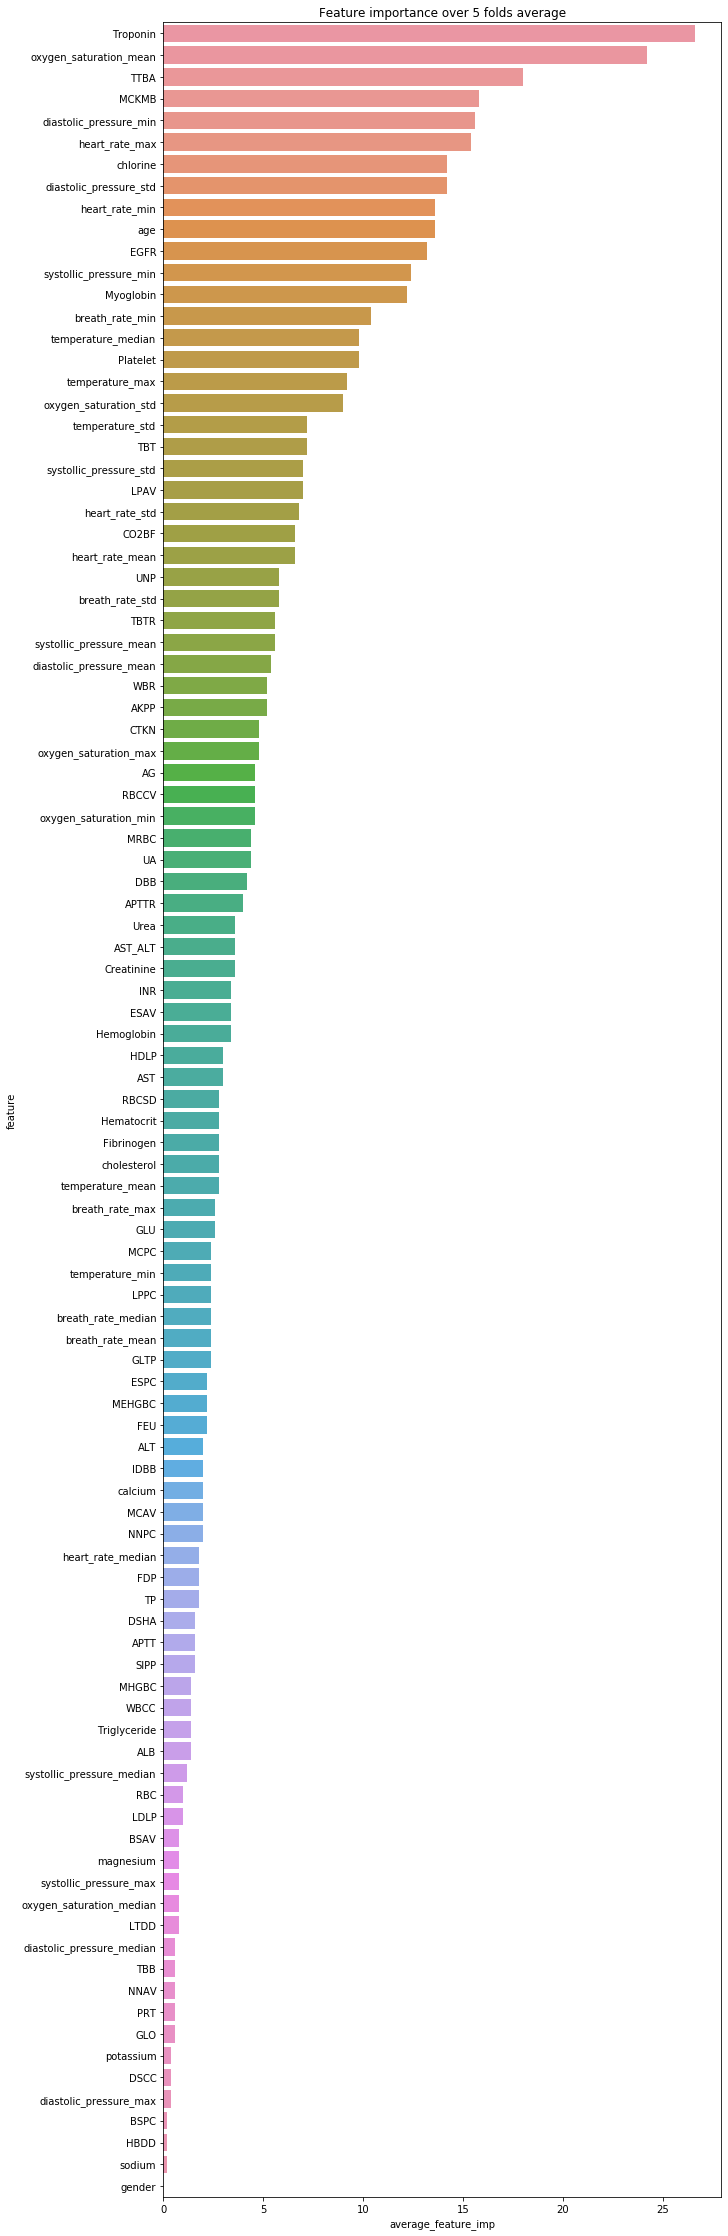

In [53]:
plot_feature_importance(df=feature_importances, k_fold_object=kf)

# Feature_Importance

## rf

In [54]:
importances = rf.feature_importances_
feat_labels = data.columns[:-1]
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) MCKMB                          0.084762
 2) TTBA                           0.076747
 3) oxygen_saturation_mean         0.072413
 4) EGFR                           0.070405
 5) Troponin                       0.057067
 6) Myoglobin                      0.054411
 7) temperature_max                0.052699
 8) oxygen_saturation_std          0.047013
 9) diastolic_pressure_min         0.040999
10) systollic_pressure_min         0.032546
11) diastolic_pressure_std         0.023150
12) APTTR                          0.020310
13) UNP                            0.017941
14) oxygen_saturation_median       0.017672
15) heart_rate_std                 0.014369
16) oxygen_saturation_min          0.014048
17) systollic_pressure_mean        0.013572
18) systollic_pressure_median      0.011694
19) LPAV                           0.011191
20) heart_rate_max                 0.010871
21) CO2BF                          0.010783
22) diastolic_pressure_mean        0.010399
23) TBT                         

## abc

In [55]:
importances = abc.feature_importances_
feat_labels = data.columns[:-1]
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) TTBA                           0.051546
 2) Troponin                       0.041237
 3) heart_rate_min                 0.041237
 4) systollic_pressure_std         0.041237
 5) Myoglobin                      0.041237
 6) heart_rate_std                 0.030928
 7) EGFR                           0.030928
 8) oxygen_saturation_mean         0.030928
 9) chlorine                       0.030928
10) systollic_pressure_min         0.030928
11) systollic_pressure_mean        0.020619
12) HDLP                           0.020619
13) diastolic_pressure_min         0.020619
14) temperature_median             0.020619
15) breath_rate_std                0.020619
16) age                            0.020619
17) Platelet                       0.020619
18) LPAV                           0.020619
19) AST                            0.020619
20) breath_rate_min                0.020619
21) diastolic_pressure_mean        0.020619
22) temperature_max                0.020619
23) MCKMB                       

## gbc

In [56]:
importances = gbc.feature_importances_
feat_labels = data.columns[:-1]
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) Myoglobin                      0.110280
 2) EGFR                           0.081732
 3) MCKMB                          0.070290
 4) TTBA                           0.055508
 5) temperature_max                0.050358
 6) oxygen_saturation_mean         0.044917
 7) oxygen_saturation_std          0.043922
 8) Troponin                       0.042961
 9) diastolic_pressure_min         0.030806
10) oxygen_saturation_median       0.029606
11) heart_rate_max                 0.025611
12) diastolic_pressure_std         0.025337
13) systollic_pressure_min         0.021922
14) UNP                            0.016590
15) breath_rate_min                0.015664
16) LPAV                           0.011895
17) INR                            0.011890
18) age                            0.011409
19) systollic_pressure_median      0.011407
20) oxygen_saturation_min          0.011089
21) systollic_pressure_mean        0.011075
22) APTTR                          0.010912
23) diastolic_pressure_mean     